# Stock Price Modelling Regression Experiment 1.0

Stock Price modelling - Experimentation Summary:

Build baseline models with default parameters. Then tune the same models. Evaluate their performance on Train/Valid/Test set. Save all models and their error performance.

# Modelling Regression Experiment #1.0

- Split data into Train / Validation / Test set
- Create Baseline Models
    - 1) Arima
        - Test for stationarity
        - Find p, q, d terms
        - Model Building
    - 2) Multivariate Arima
        - Causality investigation.
        - Test for stationary
        - Model Building.
        - Test for residuals (errors).
        - Forecasting
        - Model evaluation
    - 3) Random Forest
        - Baseline Model with Train set and evaluate on test set.
        - Model Tuning with Train set, select best parameters with Validation set and evaluate on test set
    - 4) XGBoost
        - Baseline Model with Train set and evaluate on test set.
        - Model Tuning with Train set, select best parameters with Validation set and evaluate on test set
    - 5) kNN
        - Baseline Model with Train set and evaluate on test set.
        - Model Tuning with Train set, select best parameters with Validation set and evaluate on test set
    - 6) SVM
        - Baseline Model with Train set and evaluate on test set.
        - Model Tuning with Train set, select best parameters with Validation set and evaluate on test set
    - 7) LSTM
        - Baseline Model with Train set and evaluate on test set.
        - Model Tuning with Train set, select best parameters with Validation set and evaluate on test set
- Compare their error performace

# Future Ideas / Work

Feature engineering with financial indicators

# 1 Install more libraries

Some libraries in remote Kaggle notebook are missing. They need to be installed 

In [1]:
!pip install -q yfinance==0.2.36
!pip install -q pmdarima
# !pip install -q pandas_datareader

# 2 Loading the libraries

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O


# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sklearn libraries
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 3 Download stock data

In [13]:
def get_stock_data(stock_name):
    
    # For time stamps
    from datetime import datetime
    import yfinance as yf
    
    # The tech stocks we'll use for this analysis
    tech_list = [stock_name]

    dict_of_stocks = {}

    end = datetime.now()
    start = datetime(end.year - 16, end.month, end.day)

    for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end)
        dict_of_stocks[tech_list[0]] = globals()[stock]
        

    return dict_of_stocks[tech_list[0]]

In [14]:
main_df = get_stock_data("KRI.AT")

[*********************100%%**********************]  1 of 1 completed


# 4 Inspecting the data

In [15]:
main_df.head(), main_df.tail()

(                Open      High       Low     Close  Adj Close  Volume
 Date                                                                 
 2008-04-14  1.305882  1.327058  1.291764  1.291764   0.922703    7791
 2008-04-15  1.305882  1.312940  1.291764  1.298823   0.927745   10511
 2008-04-16  1.327058  1.334117  1.277646  1.284705   0.917660   17212
 2008-04-17  1.291764  1.298823  1.270587  1.270587   0.907576   12537
 2008-04-18  1.277646  1.348234  1.277646  1.348234   0.963039   27548,
              Open   High   Low  Close  Adj Close  Volume
 Date                                                    
 2024-04-08  11.00  11.70  11.0  11.60      11.60   65375
 2024-04-09  11.60  11.80  11.6  11.65      11.65   38650
 2024-04-10  11.65  11.65  11.4  11.50      11.50    6240
 2024-04-11  11.30  11.45  11.1  11.20      11.20   22731
 2024-04-12  11.15  11.30  11.0  11.30      11.30   15436)

# 4-1 Performances dataframe for models' error/evaluation

In [16]:
df_default_model_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['rf', 'XGBoost', 'svm', 'kNN', 'LSTM'])


df_default_model_with_lagged_features_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['rf', 'XGBoost', 'svm', 'kNN', 'LSTM'])


df_default_model_with_fe_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['rf', 'XGBoost', 'svm', 'kNN', 'LSTM'])


df_default_model_with_lagged_features_with_fe_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['rf', 'XGBoost', 'svm', 'kNN', 'LSTM'])


df_tuned_model_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['rf', 'XGBoost', 'svm', 'kNN', 'LSTM'])



df_tuned_model_with_lagged_features_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['Arima', 'VAR', 'rf_tuned', 'XGBoost_tuned', 'svm_tuned', 'kNN_tuned', 'LSTM_tuned'])

    
df_tuned_model_with_fe_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['Arima', 'VAR', 'rf_tuned', 'XGBoost_tuned', 'svm_tuned', 'kNN_tuned', 'LSTM_tuned'])


df_tuned_model_with_lagged_features_with_fe_rmse_performance = pd.DataFrame({
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]
}, index=['Arima', 'VAR', 'rf_tuned', 'XGBoost_tuned', 'svm_tuned', 'kNN_tuned', 'LSTM_tuned'])

In [17]:
df_performances = pd.DataFrame({
    
    'rmse': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN],
    'mape': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN],
    'model': [np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN, np.NAN]

 }, index=['arima', 'var', 'rf_default', 'xgboost_default', 'svm_default', 'knn_default', 'lstm_default',
           'rf_fe', 'xgboost_fe', 'svm_fe', 'knn_fe', 'lstm_fe',
           'rf_fe_tuned', 'xgboost_fe_tuned', 'svm_fe_tuned', 'knn_fe_tuned', 'lstm_fe_tuned'])

# 4-2 Dataset timestamps

In [18]:
#Experiment_1

train_start_time = '2020-01-01'
train_end_time = '2024-02-29'

validation_start_time = '2024-03-01'
validation_end_time = '2024-03-31'

test_start_time = '2024-04-01'
test_end_time = str(main_df.index[-1].year)+"-"+str(main_df.index[-1].month)+"-"+str(main_df.index[-1].day)


"""
#Experiment_NKE

# NKE
train_start_time = '2009-01-01'
train_end_time = '2017-04-03' 

validation_start_time = '2009-01-01'
validation_end_time = '2017-04-03'

test_start_time = '2017-04-04'
test_end_time = '2019-04-03'
 """

#Experiment_2
""" 
train_start_time = '2020-01-01'
train_end_time = '2022-12-31' 

validation_start_time = '2023-01-01'
validation_end_time = '2023-09-30'

test_start_time = '2023-10-01'
 """

#Experiment_3
""" 
train_start_time = '2018-01-01'
train_end_time = '2022-12-31' 

validation_start_time = '2023-01-01'
validation_end_time = '2023-09-30'

test_start_time = '2023-10-01' 
 """

#Experiment_4
""" 
train_start_time = str(main_df.index[0].year)+"-"+str(main_df.index[0].month)+"-"+str(main_df.index[0].day)
train_end_time = '2022-12-31' 

validation_start_time = '2023-01-01'
validation_end_time = '2023-09-30'

test_start_time = '2023-10-01' 
 """

' \ntrain_start_time = str(main_df.index[0].year)+"-"+str(main_df.index[0].month)+"-"+str(main_df.index[0].day)\ntrain_end_time = \'2022-12-31\' \n\nvalidation_start_time = \'2023-01-01\'\nvalidation_end_time = \'2023-09-30\'\n\ntest_start_time = \'2023-10-01\' \n '

# Feature Engineering - Creating Financial Indicators

In [19]:
def financial_indicators(main_df):

    import pandas_ta as ta

    # simple moving average
    sma = ta.sma(main_df["Close"], length=7)
    main_df['sma'] = sma

    # Weighted Moving Average: wma
    wma = ta.wma(main_df["Close"], length=7)
    main_df['wma'] = wma

    # Momemtum
    mom = ta.mom(main_df["Close"], length=7)
    main_df['mom'] = mom

    # stochastic ochilator
    stoch = ta.stoch(high = main_df["High"], low = main_df["Low"], close = main_df["Close"])
    main_df['stoch_k'] = stoch["STOCHk_14_3_3"]
    main_df['stoch_d'] = stoch["STOCHd_14_3_3"]

    # RSI
    rsi = ta.rsi(main_df["Close"], length=7)
    main_df['rsi'] = rsi

    # MACD
    macd = ta.macd(main_df["Close"])
    main_df['macd'] = macd['MACD_12_26_9']

    # William's R
    willr = ta.willr(high = main_df["High"], low = main_df["Low"], close = main_df["Close"], length=7)
    main_df['willr'] = willr

    # A/D (Accumulation/Distribution) Oscillator
    adosc = ta.adosc(high = main_df["High"], low = main_df["Low"], close = main_df["Close"], volume = main_df['Volume'])
    main_df['adosc'] = adosc

    # Commodity Channel Index: cci
    cci = ta.cci(high = main_df["High"], low = main_df["Low"], close = main_df["Close"])
    # main_df['cci'] = cci

    main_df.dropna(inplace=True)

    return main_df

# 5 Statistical Learning - Time Series

Here I have a method that creates the train, validation and test set.

In [20]:
def split_dataset_for_arima(main_df, 
                            train_start = '2020-01-01',
                            train_end = '2022-12-31', 
                            validation_start = '2023-01-01',
                            validation_end = '2023-08-31',
                            test_start = '2023-09-01',
                            test_end = '2023-09-30',
                            with_fe = False):
    

    # if feature engineering:
    if with_fe:
        main_df = financial_indicators(main_df.copy())


    # Split the data into train, validation, and test sets
    train_set = main_df[(main_df.index >= train_start) & (main_df.index <= train_end)]
    validation_set = main_df[(main_df.index >= validation_start) & (main_df.index <= validation_end)]
    train_and_validation_set = pd.concat([train_set, validation_set], axis=0)
    test_set = main_df[(main_df.index >= test_start) & (main_df.index <= test_end)]


    # Print the sizes of the sets
    print("Train Set Size:", len(train_set))
    print("Validation Set Size:", len(validation_set))
    print("Test Set Size:", len(test_set))


    print(test_set.tail(10))

    return train_set, validation_set, train_and_validation_set, test_set

# 5-1. Spliting the dataset for Arima model

I call the method above to create the train, validation and test set from statistical timeseries analysis

In [21]:
train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_arima(main_df.copy(), 
                                    train_start = train_start_time,
                                    train_end = train_end_time, 
                                    validation_start = validation_start_time,
                                    validation_end = validation_end_time,
                                    test_start = test_start_time,
                                    test_end = test_end_time,
                                    with_fe=False)

Train Set Size: 1038
Validation Set Size: 18
Test Set Size: 9
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2024-04-02  11.60  11.75  11.30  11.35      11.35   12363
2024-04-03  11.45  11.45  10.85  11.00      11.00   30058
2024-04-04  11.00  11.10  10.95  11.00      11.00   39147
2024-04-05  11.00  11.05  10.80  10.90      10.90   28867
2024-04-08  11.00  11.70  11.00  11.60      11.60   65375
2024-04-09  11.60  11.80  11.60  11.65      11.65   38650
2024-04-10  11.65  11.65  11.40  11.50      11.50    6240
2024-04-11  11.30  11.45  11.10  11.20      11.20   22731
2024-04-12  11.15  11.30  11.00  11.30      11.30   15436


# 6 Arima model

# 6.1 Sources/tutorials

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

# 6.2 Dickey Fuller Test

In [22]:
def dickey_fuller_test(df):

    from statsmodels.tsa.stattools import adfuller
    from numpy import log
    
    result = adfuller(df.Close.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

dickey_fuller_test(train_set)

ADF Statistic: 0.019666
p-value: 0.960129


If the p-value is less than a significance level (e.g. 0.05), you can reject the null hypothesis, indicating that the time series is stationary.

If the p-value is greater than the significance level, you fail to reject the null hypothesis, suggesting that the time series is non-stationary.

The p-value is 0.608091, which is greater than the common significance level of 0.05. Therefore, based on this ADF test, you fail to reject the null hypothesis, suggesting that your time series is likely non-stationary. Non-stationary time series often exhibit trends, seasonality, or other patterns that change over time.

# 6-3 How to find the order of differencing (d) in ARIMA model

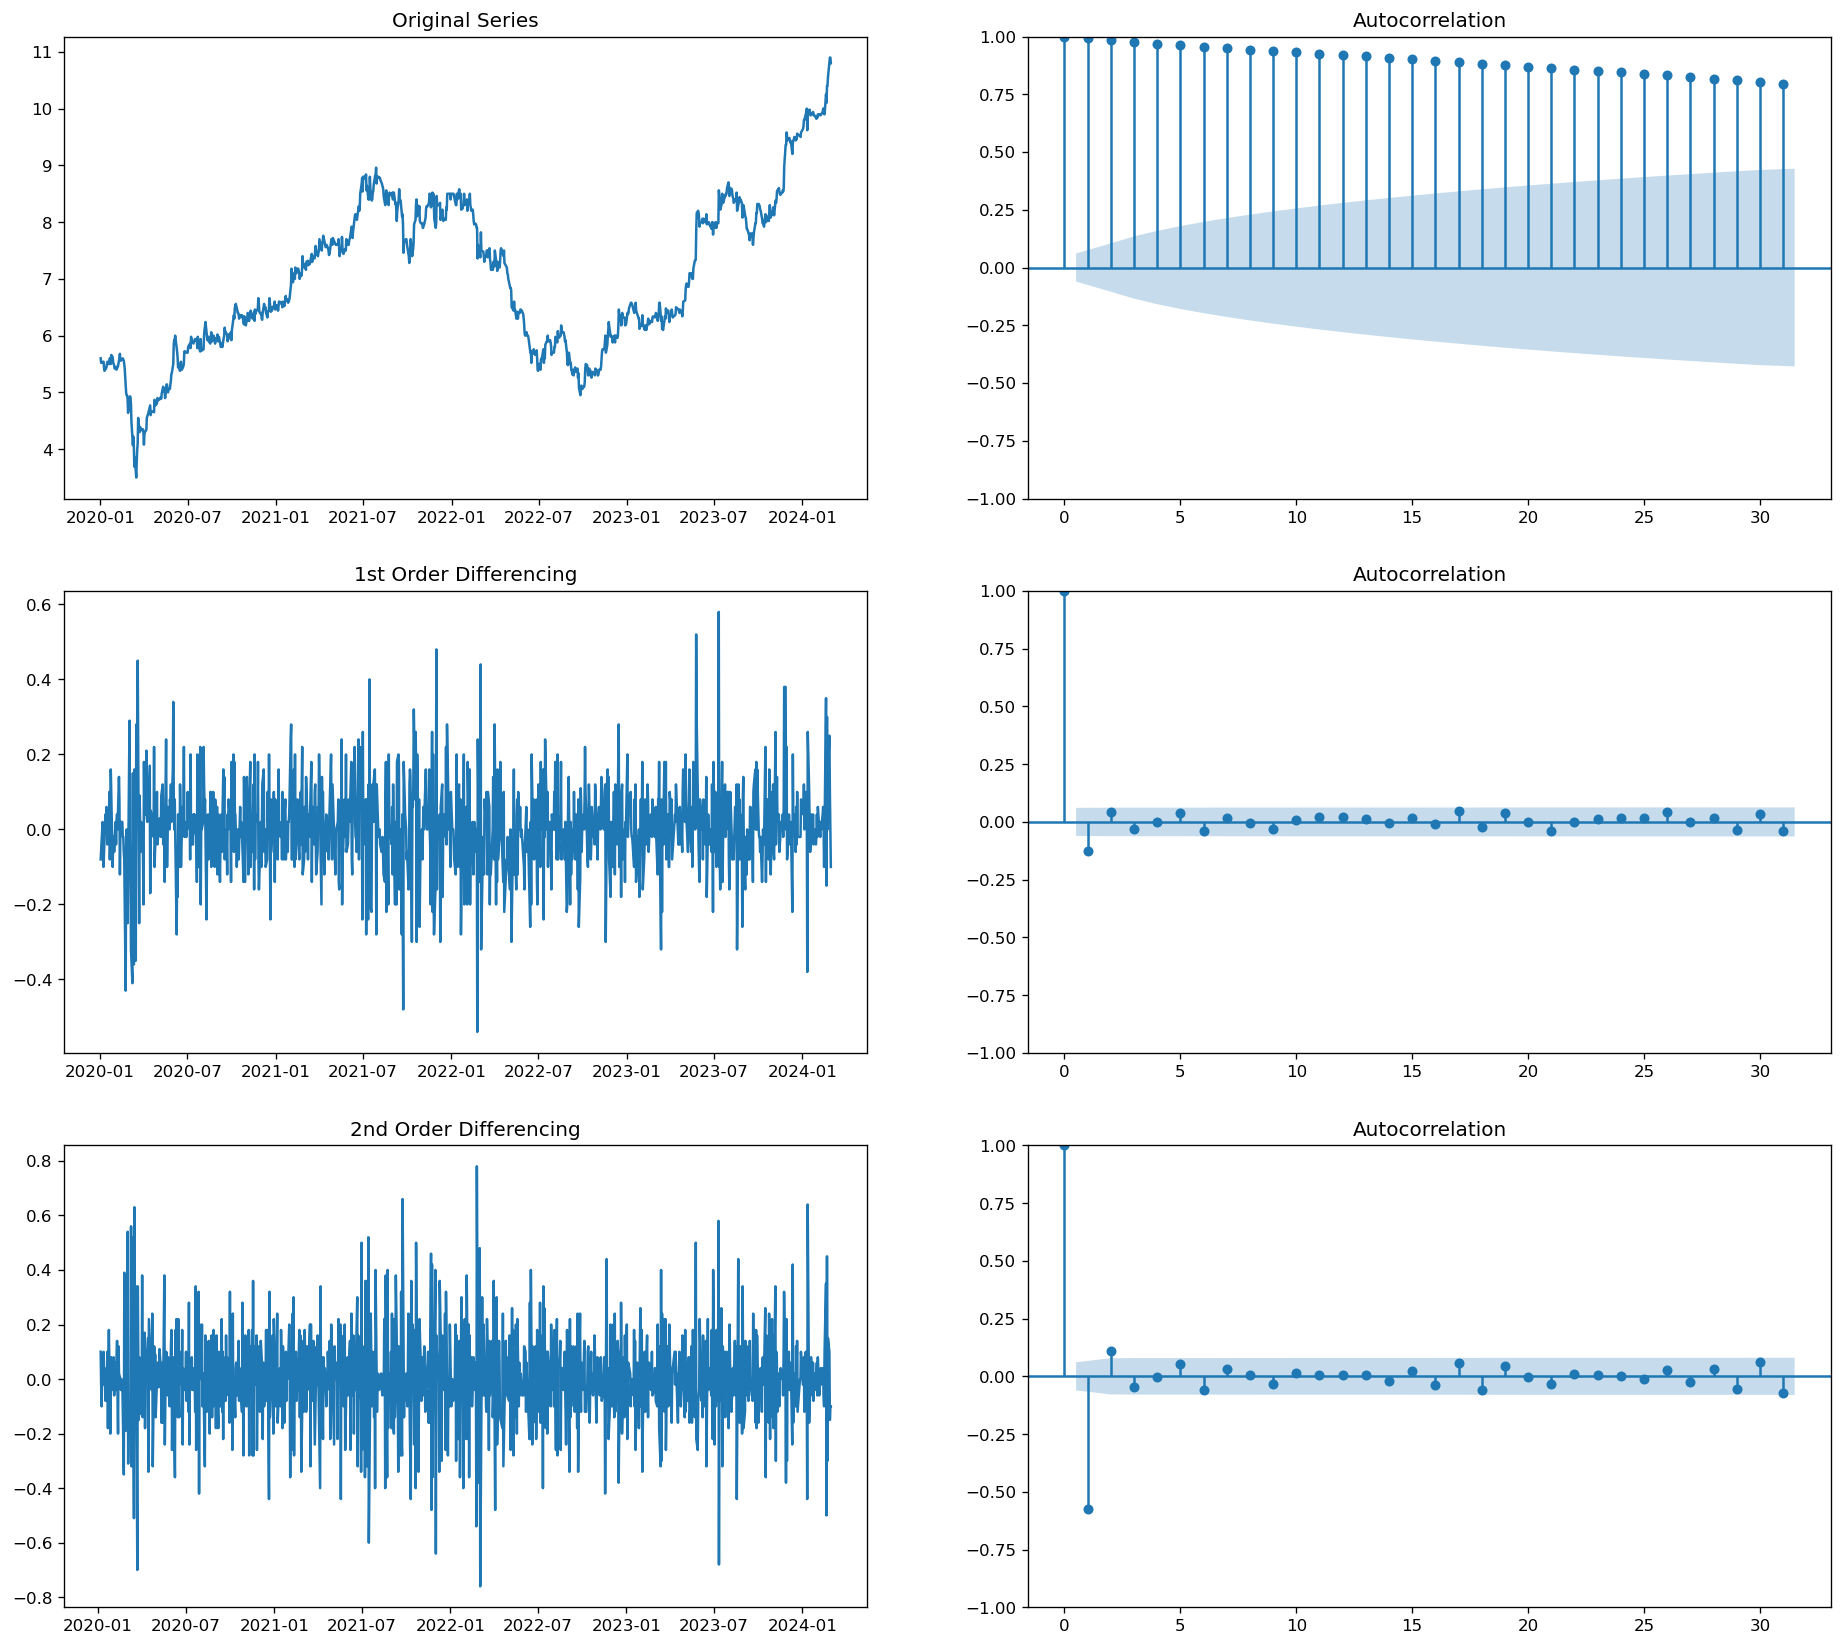

In [23]:
def autocorrelation_plots(df):

    from statsmodels.graphics.tsaplots import plot_acf
    plt.rcParams.update({'figure.figsize':(19,17), 'figure.dpi':120})

    # Original Series
    fig, axes = plt.subplots(3, 2)
    axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
    plot_acf(df.Close, ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(df.Close.diff().dropna(), ax=axes[1, 1])

    # 2nd Differencing
    axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(df.Close.diff().diff().dropna(), ax=axes[2, 1])

    plt.show()

autocorrelation_plots(train_set)

# 6-4 Adf Test - KPSS test - PP test

**Augmented Dickey-Fuller**

The Augmented Dickey-Fuller test takes as its null hypothesis that the time series has a unit root - a characteristic of non-stationary time series. Conversely, the alternative hypothesis (under which the null hypothesis is rejected) is that the series is stationary.

Null Hypothesis (HO): The series is not stationary or has a unit root.

Alternative hypothesis (HA): The series is stationary with no unit root.

Since the null hypothesis assumes the presence of a unit root, the p-value obtained should be less than a specified significance level, often set at 0.05, to reject this hypothesis. This result indicates the stationarity of the series. The adfuller() function within the Statsmodels library is a handy tool for implementing the ADF test. Its output includes four values: the p-value, the value of the test statistic, the number of lags included in the test, and critical value thresholds for three different levels of significance.


**Kwiatkowski-Phillips-Schmidt-Shin test (KPSS)**

The KPSS test checks if a time series is stationary around a mean or linear trend. In this test, the null hypothesis is that the data are stationary, and we look for evidence that the null hypothesis is false. Consequently, small p-values (e.g., less than 0.05) rejects the null hypothesis and suggest that differencing is required. Statsmodels library provides an implementation of the KPSS test via the kpss() function.




In [24]:
def adf_kpss_pp_tests():

    from pmdarima.arima.utils import ndiffs

    ## Adf Test
    adf = ndiffs(train_set.Close, test='adf')  # 1

    # KPSS test
    kpss = ndiffs(train_set.Close, test='kpss')  # 1

    # PP test:
    pp = ndiffs(train_set.Close, test='pp')  # 1

    print(adf, kpss, pp)

# 6-5 PACF plot

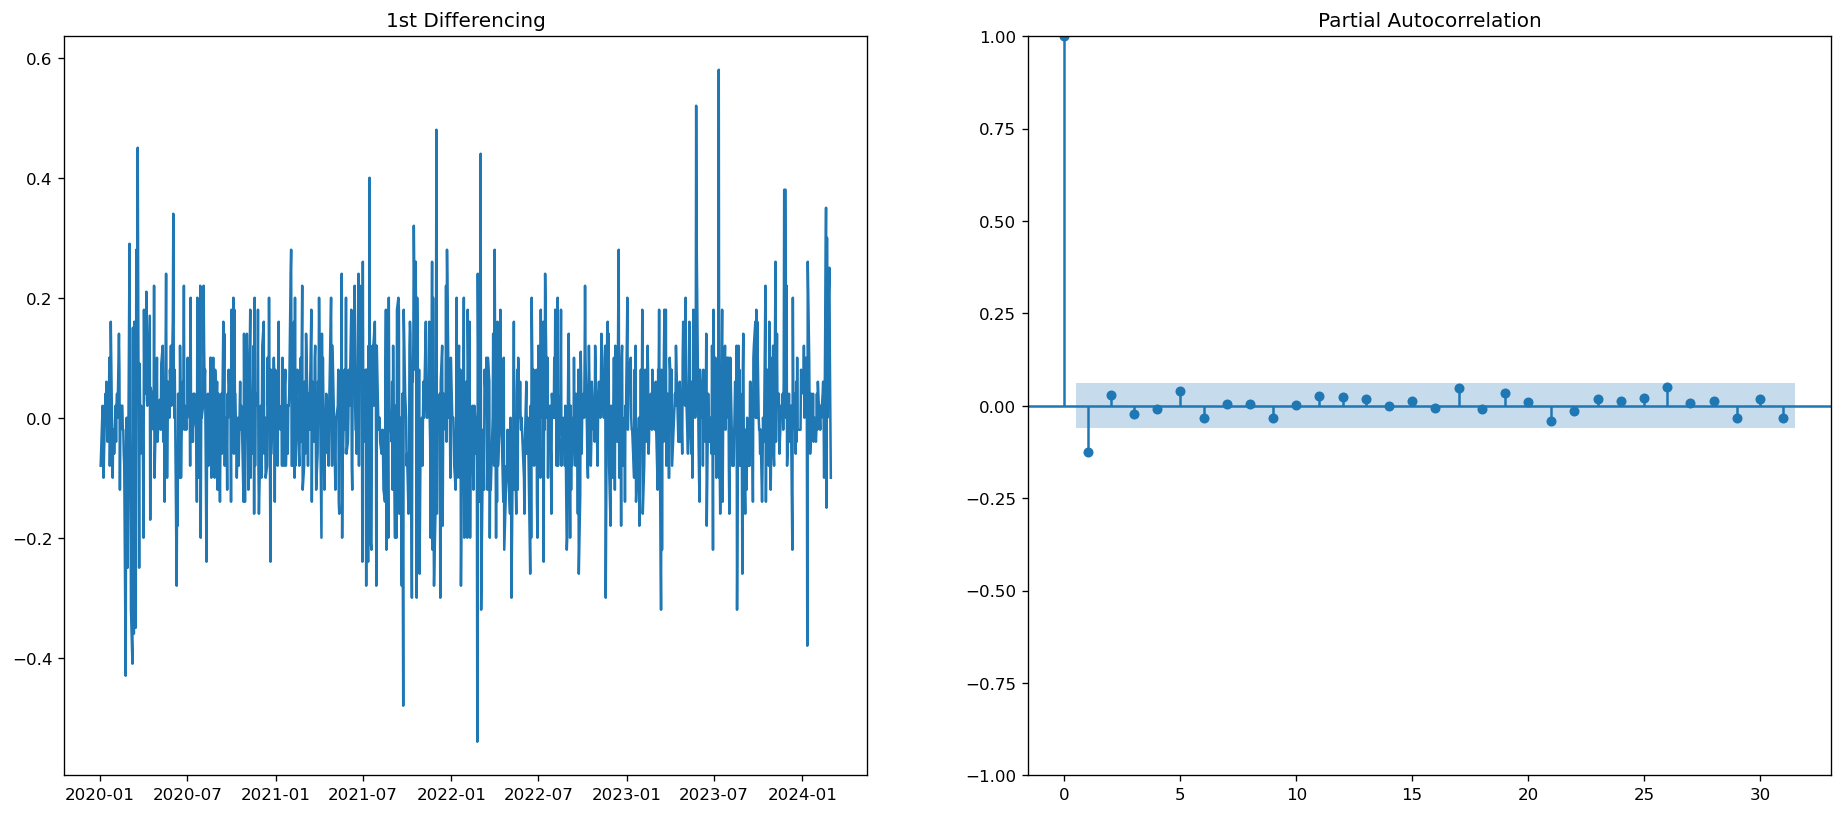

In [25]:
def partial_autocorrelation_plots(df):

    from statsmodels.graphics.tsaplots import plot_pacf

    # PACF plot of 1st differenced series
    plt.rcParams.update({'figure.figsize':(19,8), 'figure.dpi':120})

    fig, axes = plt.subplots(1, 2)
    axes[0].plot(df.Close.diff()); axes[0].set_title('1st Differencing')
    axes[1].set(ylim=(0,5))
    plot_pacf(df.Close.diff().dropna(), ax=axes[1])

    plt.show()

partial_autocorrelation_plots(train_set)

# Predict with custom Arima model

In [26]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(main_df['Close'], order=(1, 1, 0))
model_fit = model.fit()

y_pred = model_fit.forecast(100)
y_pred

c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pr

3984    11.291128
3985    11.291915
3986    11.291845
3987    11.291852
3988    11.291851
          ...    
4079    11.291851
4080    11.291851
4081    11.291851
4082    11.291851
4083    11.291851
Name: predicted_mean, Length: 100, dtype: float64

# 6-6 Auto Arima to find the best parameters

find the optimal p, q, d orders

source / tutorial at:
https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [27]:
def auto_arima(df):

     import pmdarima as pm

     auto_arima_model = pm.auto_arima(df['Close'], start_p=1, d=None, start_q=1, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False,error_action='ignore',  
                              suppress_warnings=True,
                         stepwise=True, trace=True)
     
     return auto_arima_model

auto_arima_model = auto_arima(train_set)

          

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1435.162, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1421.762, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1436.076, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1435.050, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1422.002, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1434.952, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1433.162, Time=2.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1435.800, Time=0.48 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 4.613 seconds


# 6-7 Build Arima model after finding AutoArima parameters

After using AutoArima, lets build the Arima model using statsmodels library

c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   10
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -2.200
Date:                Sun, 14 Apr 2024   AIC                              8.400
Time:                        14:40:06   BIC                              8.794
Sample:                             0   HQIC                             7.549
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1139      0.702      0.162      0.871      -1.262       1.490
sigma2         0.0953      0.043      2.231      0.026       0.012       0.179
Ljung-Box (L1) (Q):                   0.00   Jarque-

<Figure size 2280x960 with 0 Axes>

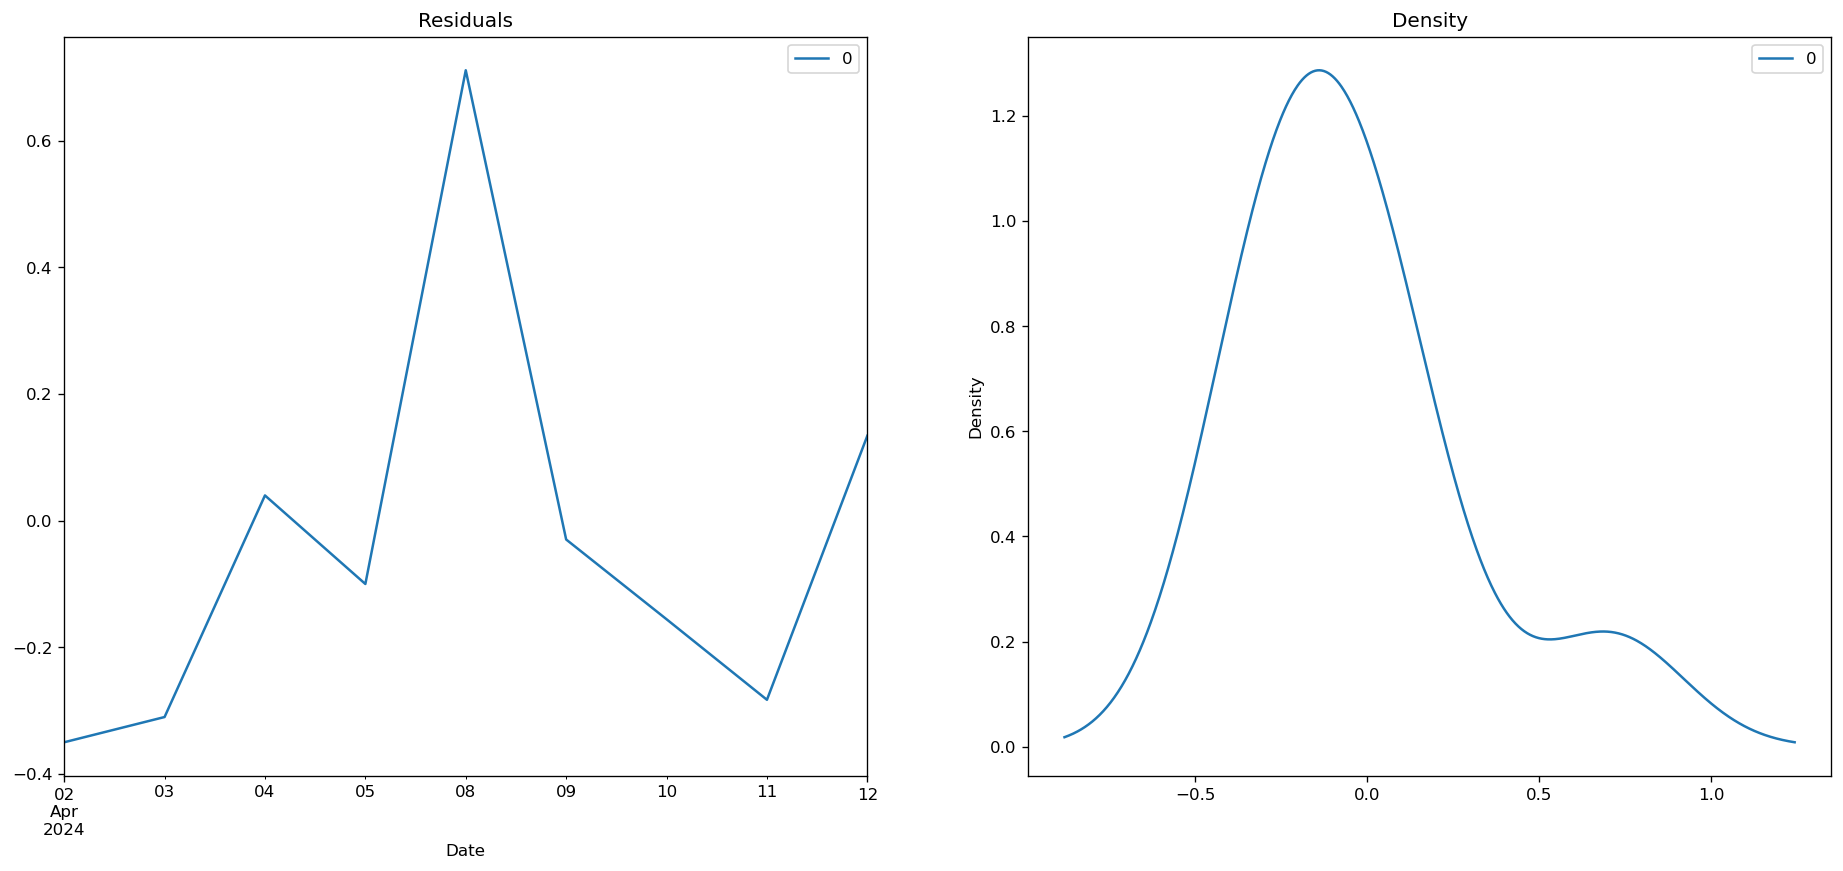

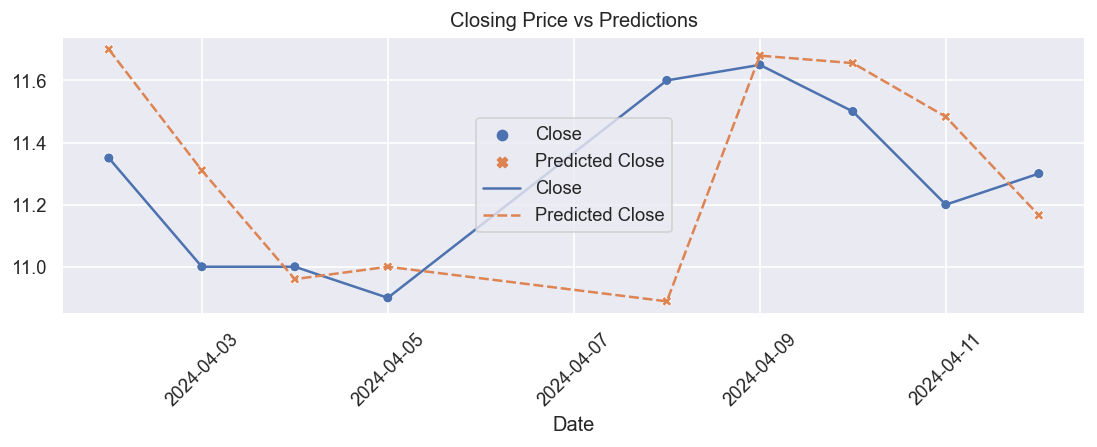

In [28]:
def build_arima_model(auto_arima_model, test_set):

    from statsmodels.tsa.arima.model import ARIMA

    # Fit the ARIMA model into the test set
    df = pd.concat([validation_set[-auto_arima_model.order[0]:], test_set])

    arima_model = ARIMA(df['Close'], order=(auto_arima_model.order[0], 
                                            auto_arima_model.order[1], 
                                            auto_arima_model.order[2]))




    arima_model_res = arima_model.fit()
    print(arima_model_res.summary())

    # create forecasts
    forecasts =  arima_model_res.predict(start=auto_arima_model.order[0], end=len(df)-1)
    print(len(forecasts))

    # evaluate forecasts against test_set
    from sklearn.metrics import mean_squared_error

    mse = mean_squared_error(test_set['Close'], forecasts)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Plot residual errors
    residuals = pd.DataFrame(arima_model_res.resid)[1:]
    
    plt.figure()
    fig, ax = plt.subplots(1,2)
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_set.index,
                       'Close': test_set['Close'],
                        'Predicted Close': forecasts
                            })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')

    df_performances['Arima'] = rmse

    return arima_model, rmse

arima_model, arima_rmse = build_arima_model(auto_arima_model, test_set)

# Facebook Prophet ----

In [29]:
# Experiment_1
initial_df = get_stock_data("KRI.AT")
main_df = initial_df

train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_arima(main_df.copy(), 
                                    train_start = train_start_time,
                                    train_end = train_end_time, 
                                    validation_start = validation_start_time,
                                    validation_end = validation_end_time,
                                    test_start = test_start_time,
                                    test_end = test_end_time)


# Rename columns to meet Prophet's requirements
train_and_validation_set.rename(columns={'Close': 'y', 'Adj Close': 'adj_close'}, inplace=True)
train_and_validation_set['ds'] = pd.to_datetime(train_and_validation_set.index)


train_and_validation_set.tail()

[*********************100%%**********************]  1 of 1 completed

Train Set Size: 1038
Validation Set Size: 18
Test Set Size: 9
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2024-04-02  11.60  11.75  11.30  11.35      11.35   12363
2024-04-03  11.45  11.45  10.85  11.00      11.00   30058
2024-04-04  11.00  11.10  10.95  11.00      11.00   39147
2024-04-05  11.00  11.05  10.80  10.90      10.90   28867
2024-04-08  11.00  11.70  11.00  11.60      11.60   65375
2024-04-09  11.60  11.80  11.60  11.65      11.65   38650
2024-04-10  11.65  11.65  11.40  11.50      11.50    6240
2024-04-11  11.30  11.45  11.10  11.20      11.20   22731
2024-04-12  11.15  11.30  11.00  11.30      11.30   15436


Open   High    Low      y  adj_close  Volume         ds
Date                                                                
2024-03-21  11.80  11.85  11.60  11.65      11.65   11886 2024-03-21
2024-03-22  11.60  11.85  11.60  11.80      11.80   12536 2024-03-22
2024-03-26  11.95  11.95  11.80  11.90      11.90    5407 2024-03-26
2024-03-27  11.85  11.95  11.75  11.90      11.90   14472 2024-03-27
2024-03-28  11.80  11.80  11.55  11.70      11.70   10982 2024-03-28

In [26]:
from prophet import Prophet

# Create and fit the Prophet model
model = Prophet(seasonality_mode='additive', yearly_seasonality=True, 
                weekly_seasonality=True, daily_seasonality=True)

model.add_regressor('Open')
model.add_regressor('High')
model.add_regressor('Low')
model.add_regressor('Volume')
""" model.add_regressor('High', main_df['High'])
model.add_regressor('Low', main_df['Low'])
model.add_regressor('Volume', main_df['Volume'])
model.add_regressor('adj_close', main_df['adj_close']) """

model.fit(train_and_validation_set)

# Create the prediction dataframe
future_df = model.make_future_dataframe(periods=test_set.shape[0])

# Create a new column in the prediction dataframe with the regressor value
future_df['Open'] = pd.concat([train_and_validation_set, test_set])['Open'].values
future_df['High'] = pd.concat([train_and_validation_set, test_set])['High'].values
future_df['Low'] = pd.concat([train_and_validation_set, test_set])['Low'].values
future_df['Volume'] = pd.concat([train_and_validation_set, test_set])['Volume'].values

# Forecast the next 10 days
forecast = model.predict(future_df)

17:49:02 - cmdstanpy - INFO - Chain [1] start processing
17:49:06 - cmdstanpy - INFO - Chain [1] done processing


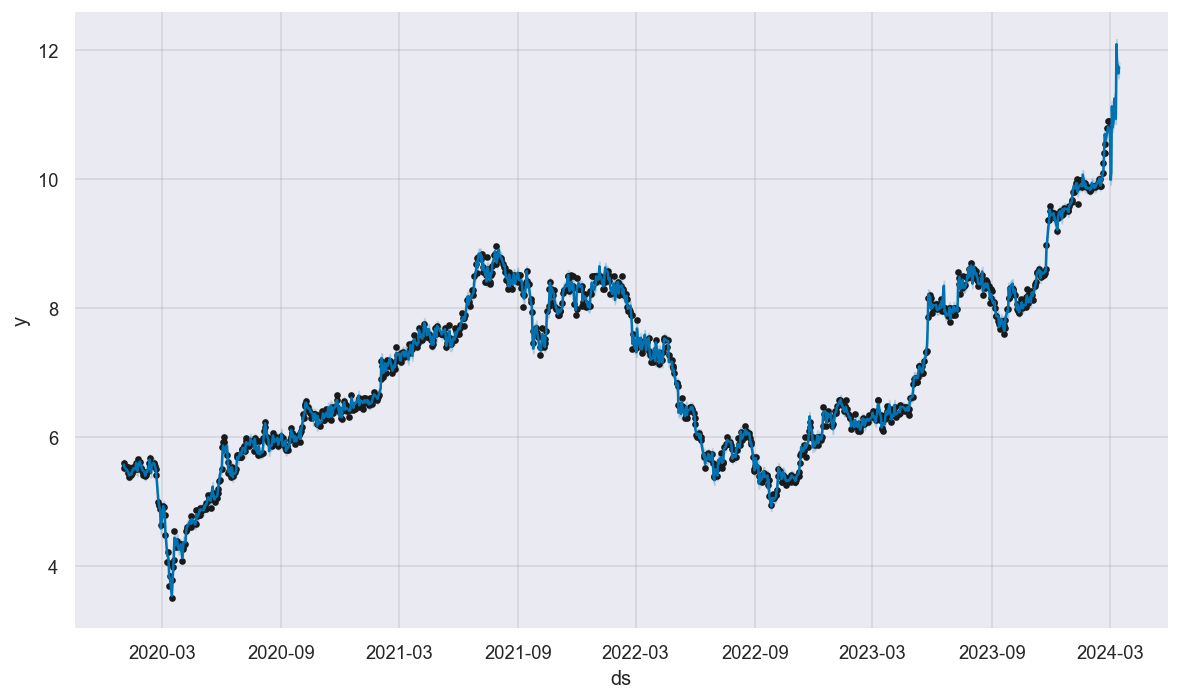

In [28]:
fig1 = model.plot(forecast)

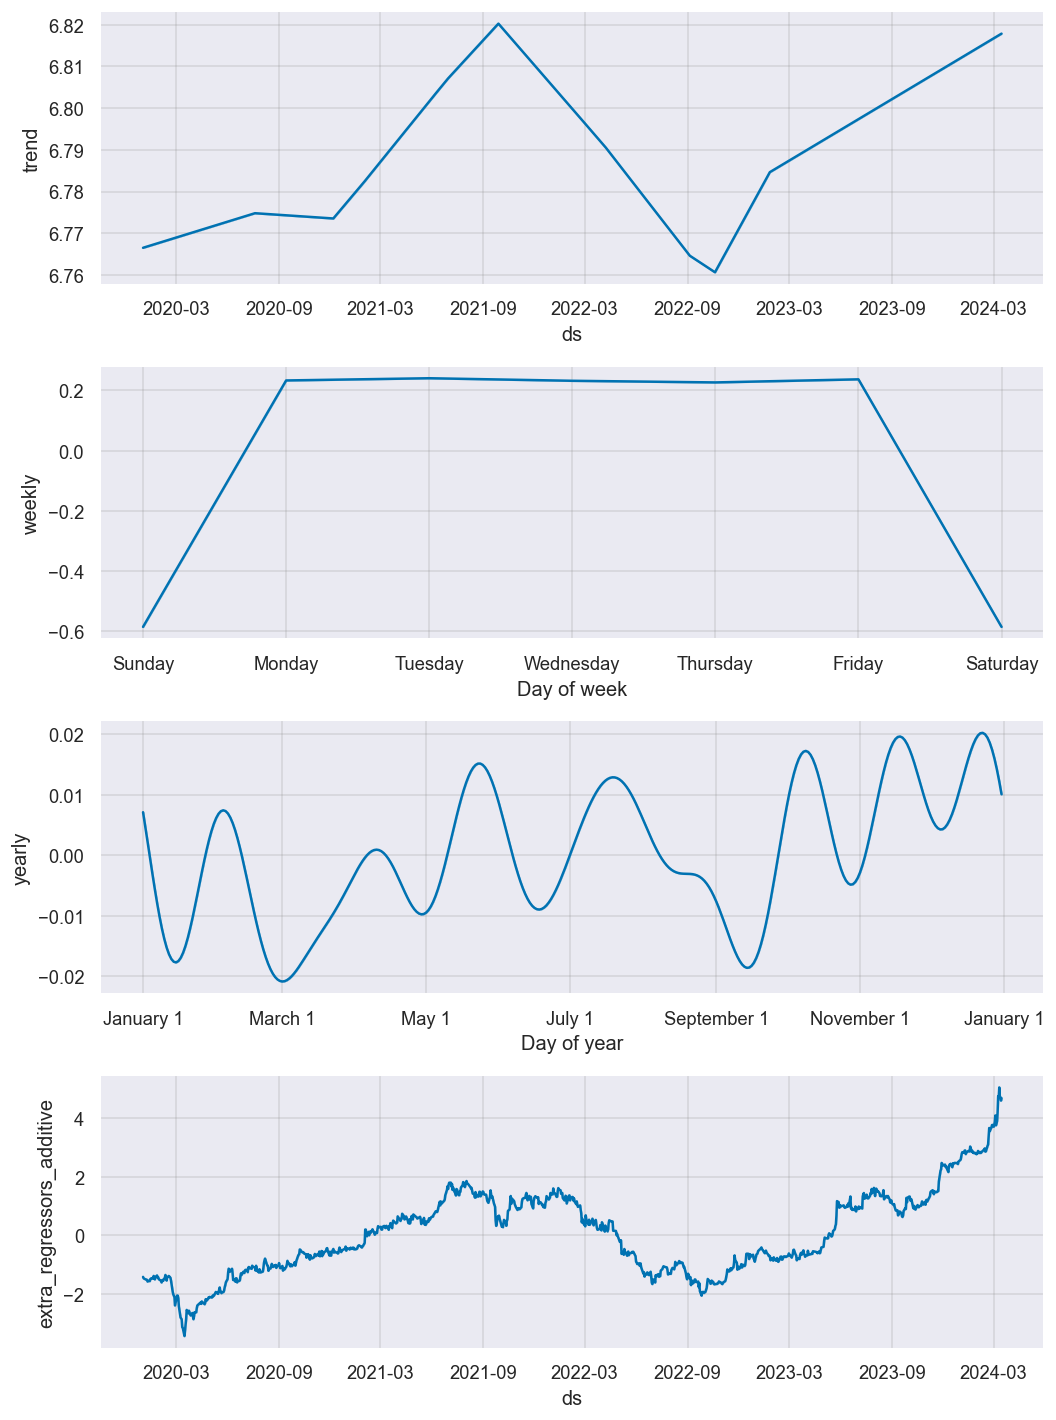

In [29]:
fig2 = model.plot_components(forecast)

Root Mean Squared Error (RMSE): 0.507388018213438


[Text(0.5, 1.0, 'Closing Price vs Predictions')]

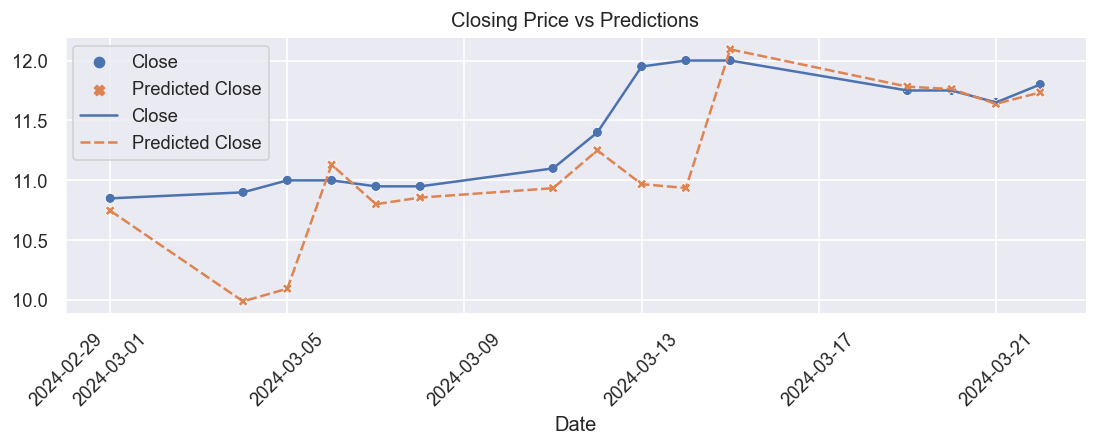

In [30]:
# evaluate forecasts against test_set
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_set['Close'], forecast.yhat[-test_set.shape[0]:].values)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

#plot Close and predicted Close price
plot_df = pd.DataFrame({'Date': test_set.index,
                    'Close': test_set['Close'],
                    'Predicted Close': forecast.yhat[-test_set.shape[0]:].values
                        })


my_plot = sns.set(rc={'figure.figsize':(11, 3)})
plt.figure()
my_plot = sns.scatterplot(plot_df)
my_plot = sns.lineplot(plot_df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
my_plot.set(title='Closing Price vs Predictions')

# 7 Multivariate Time Series


Tutorial / Source:

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

https://blogs.sap.com/2021/05/06/a-multivariate-time-series-modeling-and-forecasting-guide-with-python-machine-learning-client-for-sap-hana/

https://mlpills.dev/time-series/step-by-step-guide-to-multivariate-time-series-forecasting-with-var-models/

https://towardsdatascience.com/a-quick-introduction-on-granger-causality-testing-for-time-series-analysis-7113dc9420d2#:~:text=The%20Granger%20causality%20test%20is,predict%20tomorrow's%20Tesla's%20stock%20price%3F

In [53]:
train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_arima(main_df.copy(), 
                                    train_start = train_start_time,
                                    train_end = train_end_time, 
                                    validation_start = validation_start_time,
                                    validation_end = validation_end_time,
                                    test_start = test_start_time,
                                    test_end = test_end_time,
                                    with_fe=False)

Train Set Size: 976
Validation Set Size: 22
Test Set Size: 38


# 7-1 Test for causation amongst the time series 

Granger Causality tests

In [54]:
def test_for_causation(train_set):

    from statsmodels.tsa.stattools import grangercausalitytests

    maxlag = 20
    variables=train_set.columns
    matrix = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for col in matrix.columns:
        for row in matrix.index:
            test_result = grangercausalitytests(train_set[[row, col]], maxlag=20, verbose=False)
            p_values = [round(test_result[i+1][0]['ssr_chi2test'][1],4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            matrix.loc[row, col] = min_p_value
    matrix.columns = [var + '_x' for var in variables]
    matrix.index = [var + '_y' for var in variables]
    print(matrix)

test_for_causation(train_set)

             Open_x  High_x   Low_x  Close_x  Adj Close_x  Volume_x
Open_y       1.0000  0.0000  0.0000   0.0000       0.0000    0.0039
High_y       0.0058  1.0000  0.0000   0.0000       0.0000    0.4239
Low_y        0.0185  0.0000  1.0000   0.0000       0.0000    0.0003
Close_y      0.0005  0.0005  0.0000   1.0000       0.2558    0.3460
Adj Close_y  0.0042  0.0193  0.0191   0.1991       1.0000    0.3321
Volume_y     0.0016  0.0341  0.2265   0.0630       0.0724    1.0000


From the result above, each column represents a predictor x of each variable and each row represents the response y and the p-value of each pair of variables are shown in the matrix.

The row are the response (y) and the columns are the predictors (x). If a given p-value is < significance level (0.05), we can reject the null hypothesis and conclude that Open_x Granger causes High_y.

# 7-2 Test for stationarity -  Ad fuller test

In [55]:
def test_for_stationarity(train_set):

    from statsmodels.tsa.stattools import adfuller

    def adfuller_test(df, series, sig=0.05):
        res = adfuller(df[series], autolag='AIC')    
        p_value = round(res[1], 3)
        
        if p_value <= sig:
            print(f" {series} : P-Value = {p_value} => Stationary. ")
        else:
            print(f" {series} : P-Value = {p_value} => Non-stationary.")

    for column in train_set.columns:
        adfuller_test(train_set, column)

test_for_stationarity(train_set)

 Open : P-Value = 0.816 => Non-stationary.
 High : P-Value = 0.82 => Non-stationary.
 Low : P-Value = 0.848 => Non-stationary.
 Close : P-Value = 0.834 => Non-stationary.


 Adj Close : P-Value = 0.904 => Non-stationary.
 Volume : P-Value = 0.0 => Stationary. 


# 7-3 Transform the series to make it stationary, if needed

In [56]:
def adfuller_test(df, series, sig=0.05):
        
        from statsmodels.tsa.stattools import adfuller
        res = adfuller(df[series], autolag='AIC')    
        p_value = round(res[1], 3)

        if p_value <= sig:
            print(f" {series} : P-Value = {p_value} => Stationary. ")
        else:
            print(f" {series} : P-Value = {p_value} => Non-stationary.")


#train_set_differenced = train_and_validation_set.diff().dropna()
train_set_differenced = train_set.diff().dropna()
for column in train_set_differenced.columns:
    adfuller_test(train_set_differenced, column)

 Open : P-Value = 0.0 => Stationary. 
 High : P-Value = 0.0 => Stationary. 
 Low : P-Value = 0.0 => Stationary. 


 Close : P-Value = 0.0 => Stationary. 
 Adj Close : P-Value = 0.0 => Stationary. 
 Volume : P-Value = 0.0 => Stationary. 


# 7-4 Model Building

In [57]:
def find_best_VAR_order(train_set_differenced):

    from statsmodels.tsa.api import VAR

    maxlags=1
    var_model = VAR(train_set_differenced)
    x = var_model.select_order(maxlags)
    print(x.summary())

find_best_VAR_order(train_set_differenced)

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -6.534      -6.504    0.001453      -6.523
1     -7.843*     -7.633*  0.0003925*     -7.763*
-------------------------------------------------


c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# 7-5 Find the best lag based on AIC score

In [58]:
def find_best_lag_order(train_set_differenced):

    from statsmodels.tsa.api import VAR

    maxlags=1
    var_model = VAR(train_set_differenced)
    aic = 99999
    best_lag = 0
    for i in range(1, maxlags+1):
        result = var_model.fit(i)
        if result.aic < aic:
            aic = result.aic
            best_lag = i

    print("best lag: ", best_lag)
    return best_lag

best_lag = find_best_lag_order(train_set_differenced)

best lag:  1


c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC drops at the above lag order. So it is better to keep lag upto that value.

# 7-6 Fit the VAR model with best_lag / order

In [59]:
import statsmodels.api as sm

var_model = sm.tsa.VAR(train_set_differenced)
model_var_fitted = var_model.fit(best_lag, ic='aic')
model_var_fitted.summary()

c:\Users\praxitelis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 28, Jan, 2024
Time:                     19:52:42
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -7.63252
Nobs:                     974.000    HQIC:                  -7.76291
Log likelihood:          -4430.73    FPE:                0.000392486
AIC:                     -7.84301    Det(Omega_mle):     0.000375980
--------------------------------------------------------------------
Results for equation Open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.002017         0.003838            0.526           0.599
L1.Open             -0.463323         0.040805          -11.355           0.000
L1.High              0.114291         0.048077            2.377  

# 7-7 Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

What does this mean to us?

If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

Alright, coming back to topic.

A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic.

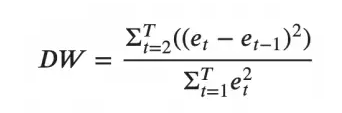

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [60]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_var_fitted.resid)


for col, val in zip(train_set_differenced.columns, out):
    print(col, ':', round(val, 2))

Open : 2.49
High : 2.21
Low : 2.17
Close : 2.01
Adj Close : 2.01
Volume : 2.29


# 7-8 How to Forecast VAR model using statsmodels

In [61]:
lag_order = model_var_fitted.k_ar

# Input data for forecasting
forecast_input = pd.concat([validation_set[-lag_order-1:], test_set]) # I add -1 cause next line we have dropna which deletes the first case
forecast_input_differenced = forecast_input.copy().diff().dropna()
forecast_input = pd.concat([validation_set[-lag_order:], test_set]) # set the corrected forecast_input df having length equal to forecasts without the extra +1 case

# Forecast
nobs = forecast_input_differenced.shape[0]
fc = model_var_fitted.forecast(y = forecast_input_differenced.values, steps = nobs)
df_forecast = pd.DataFrame(fc, index = forecast_input_differenced.index, columns = forecast_input.columns + '_1d')

# 7-9 Invert the transformation to get the real forecast

In [62]:
def invert_transformation(forecast_input, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = forecast_input.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = forecast_input[col] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(forecast_input, df_forecast)
df_results.head(lag_order+3)

Open_1d   High_1d    Low_1d  Close_1d  Adj Close_1d    Volume_1d  \
Date                                                                            
2023-11-30 -0.000324  0.015945  0.005585  0.000588      0.001458  1721.389604   
2023-12-01  0.006550 -0.001253  0.003924  0.006221      0.006631  -889.208946   
2023-12-04  0.003083  0.006752  0.004070  0.003023      0.003707   506.673308   
2023-12-05  0.004376  0.002761  0.004013  0.004598      0.005148  -226.600338   

            Open_forecast  High_forecast  Low_forecast  Close_forecast  \
Date                                                                     
2023-11-30       9.599676       9.615946      9.465585        9.500588   
2023-12-01       9.526226       9.534693      9.409509        9.446809   
2023-12-04       9.449309       9.521444      9.413579        9.489831   
2023-12-05       9.493684       9.544206      9.437592        9.494430   

            Adj Close_forecast  Volume_forecast  
Date                                             
2023-11-30            9.501458     13492.389604  
2023-12-01            9.448089      4902.180659  
2023-12-04            9.491796      7323.853967  
2023-12-05            9.496943      8198.253629

# 7-10 Plots of Forecasts vs Actuals

In [67]:
fig, axes = plt.subplots(nrows=int(len(forecast_input.columns)/2), ncols=2, dpi=150, figsize=(50,100))
for i, (col,ax) in enumerate(zip(forecast_input.columns, axes.flatten())):
    forecast_input[col].plot(legend=True, ax=ax)
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


# 7-11 Calculate RMSE for VAR model

Root Mean Squared Error (RMSE): 0.09314790500411284


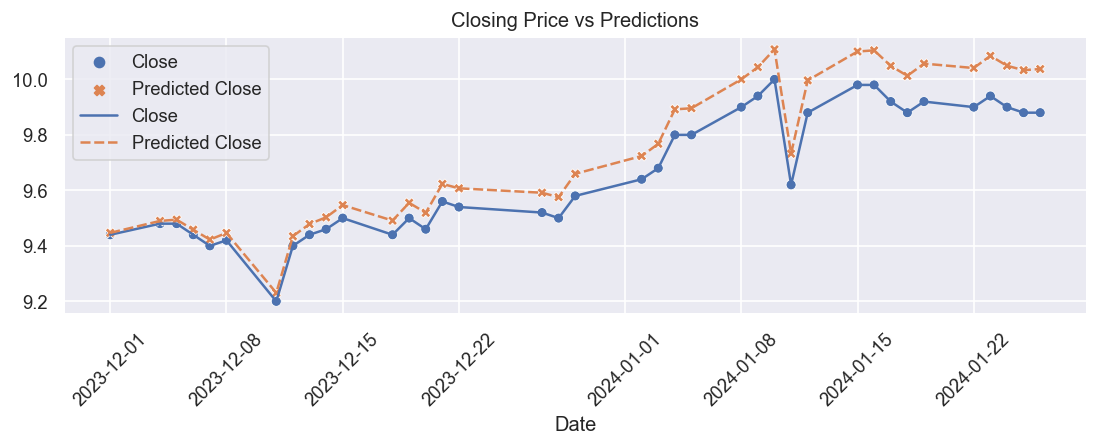

In [65]:
forecasts = df_results[df_results.index >= test_start_time]["Close_forecast"]

# evaluate forecasts against test_set
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_set['Close'], forecasts)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


#plot Close and predicted Close price
plot_df = pd.DataFrame({'Date': test_set.index,
                    'Close': test_set['Close'],
                    'Predicted Close': forecasts
                        })


my_plot = sns.set(rc={'figure.figsize':(11, 3)})
plt.figure()
my_plot = sns.scatterplot(plot_df)
my_plot = sns.lineplot(plot_df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
my_plot.set(title='Closing Price vs Predictions')

df_performances.loc['VAR'] = rmse
df_performances.loc['VAR'] = rmse

# 8 Machine Learning models

# 8-1 Split the dataset for ML

In [63]:
def split_dataset_for_ml(main_df,
                        train_start = '2020-01-01',
                        train_end = '2022-12-31', 
                        validation_start = '2023-01-01',
                        validation_end = '2023-08-31',
                        test_start = '2023-09-01',
                        test_end = '2023-09-30',
                        best_lag_period = 0,
                        with_fe = False,
                        is_diffed = False):
    
    #####
    def get_datasets_after_finding_best_lags(main_df, columns, best_lag_period):

        for lag_period in range(1, best_lag_period+1):
        # Create lag features
            for feature in columns:
                main_df['{}_Lag_{}'.format(feature, lag_period)] = main_df[feature].shift(lag_period)

                # fill NaN values
                main_df.dropna(inplace=True)

        return main_df
    #####
    
    # get initial columns from main_df
    columns = main_df.copy().columns

    if best_lag_period>0:
        main_df = get_datasets_after_finding_best_lags(main_df.copy(), columns = columns, 
                                                       best_lag_period = best_lag_period)

    ### prepare for feature engineering
    if with_fe:
        main_df = financial_indicators(main_df.copy())
    
    # Prepare the closing price as target variable    
    main_df['target'] = main_df['Close'].shift(-1)

    if is_diffed == True:
        for col in columns:
            main_df[col] = main_df[col].diff(1).dropna()
        main_df['target'] = main_df['target'].diff(1).dropna()

            

    # Split the data into train, validation, and test sets
    train_set = main_df[(main_df.index >= train_start) & (main_df.index <= train_end)]
    validation_set = main_df[(main_df.index >= validation_start) & (main_df.index <= validation_end)]
    train_and_validation_set = pd.concat([train_set, validation_set], axis=0)

    test_set = main_df[(main_df.index >= test_start) & (main_df.index <= test_end)]
    test_set = test_set[:-1]


    return train_set, validation_set, train_and_validation_set, test_set

# 8-2 Make the Train/Valid/Test split for ML

In [69]:
#Experiment_1
test_set_interval = 100

train_start_time = '2020-01-01'
train_end_time = str(main_df.index[-test_set_interval+1].year)+"-"+str(main_df.index[-test_set_interval+1].month)+"-"+str(main_df.index[-test_set_interval+1].day)


validation_start_time = '2023-12-01'
validation_end_time = str(main_df.index[-test_set_interval+1].year)+"-"+str(main_df.index[-test_set_interval+1].month)+"-"+str(main_df.index[-test_set_interval+1].day)


test_start_time = str(main_df.index[-test_set_interval].year)+"-"+str(main_df.index[-test_set_interval].month)+"-"+str(main_df.index[-test_set_interval].day)
test_end_time = str(main_df.index[-1].year)+"-"+str(main_df.index[-1].month)+"-"+str(main_df.index[-1].day)


"""
#Experiment_NKE

# NKE
train_start_time = '2009-01-01'
train_end_time = '2017-04-03' 

validation_start_time = '2009-01-01'
validation_end_time = '2017-04-03'

test_start_time = '2017-04-04'
test_end_time = '2019-04-03'
 """

#Experiment_2
""" 
train_start_time = '2020-01-01'
train_end_time = '2022-12-31' 

validation_start_time = '2023-01-01'
validation_end_time = '2023-09-30'

test_start_time = '2023-10-01'
 """

#Experiment_3
""" 
train_start_time = '2018-01-01'
train_end_time = '2022-12-31' 

validation_start_time = '2023-01-01'
validation_end_time = '2023-09-30'

test_start_time = '2023-10-01' 
 """

#Experiment_4
""" 
train_start_time = str(main_df.index[0].year)+"-"+str(main_df.index[0].month)+"-"+str(main_df.index[0].day)
train_end_time = '2022-12-31' 

validation_start_time = '2023-01-01'
validation_end_time = '2023-09-30'

test_start_time = '2023-10-01' 
 """


' \ntrain_start_time = str(main_df.index[0].year)+"-"+str(main_df.index[0].month)+"-"+str(main_df.index[0].day)\ntrain_end_time = \'2022-12-31\' \n\nvalidation_start_time = \'2023-01-01\'\nvalidation_end_time = \'2023-09-30\'\n\ntest_start_time = \'2023-10-01\' \n '

# 8-3 Default Random Forest Model

In [70]:
def build_random_forest_default_model(main_df, diffed=False, scalled=False, best_lag_period=0, with_fe=False):

    from sklearn.ensemble import RandomForestRegressor
    
    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                with_fe = with_fe,
                                is_diffed = True)
    else:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                with_fe = with_fe,
                                is_diffed = False)
        
        

    #scaling the data before modeling
    if scalled:
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(test_set)
        test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)
    else:
        train_data = train_set.copy()
        test_data = test_set.copy()
    
    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']
    
    
    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=4)
    model.fit(X_train, y_train)

    # Make predictions using the trained model
    y_pred = model.predict(X_test)

    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                with_fe = with_fe,
                                is_diffed = False)


    # unscale y_pred_diff
    if scalled and not diffed:
        # return back to original datasets
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
    elif scalled and diffed:
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)
    elif diffed and not scalled:
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)

        
    test_data["y_pred"] = y_pred
    
    # Calculate RMSE (Root Mean Squared Error) to evaluate the model's performance
    rmse = np.sqrt(mean_squared_error(test_data["target"], test_data["y_pred"]))
    print(f"RMSE: {rmse}")


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': test_data['y_pred']
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')
    
    
    return model, rmse

RMSE: 1.8562959434572124


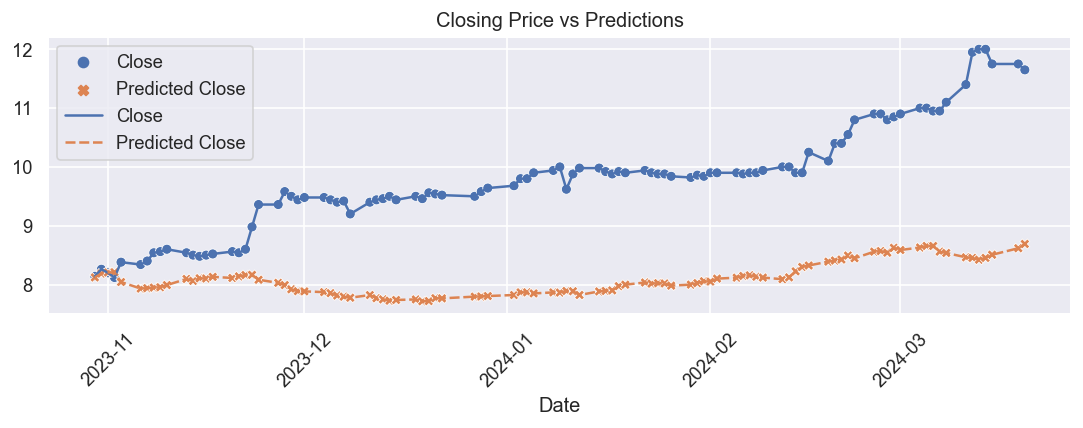

In [71]:
# Random Forest default model with default features
rf_model_default, rf_model_rmse = build_random_forest_default_model(main_df.copy(), 
                                                                    diffed=True, 
                                                                    scalled=False,
                                                                    best_lag_period=0, 
                                                                    with_fe = False)

# Save the model performance
df_performances.loc['rf'] = rf_model_rmse

# 8-3-1 Find best ML lag values

In [15]:
def get_series_with_lag(main_df, model_str='RandomForest', with_fe=False):
    
    import pandas as pd
    import numpy as np
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.svm import SVR
    import xgboost as xgb
    from sklearn.neighbors import KNeighborsRegressor
    from tensorflow import keras
    
    from sklearn.metrics import mean_squared_error
    from sklearn.preprocessing import MinMaxScaler

    # Specify the maximum lag period to consider
    max_lag_period = 7

    # Create empty lists to store lag periods and corresponding RMSE scores
    lag_periods = []
    rmse_scores = []


    features = main_df.columns
    print(model_str, with_fe)

    # get train, validation sets
    train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = 0,
                                with_fe=with_fe,
                                is_diffed = False)

    # Create lag features and evaluate RMSE for each lag period
    for lag_period in range(0, max_lag_period + 1):
         
            
        if lag_period > 0:
        # Create lag features
            for feature in features:
                main_df['{}_Lag_{}'.format(feature, lag_period)] = main_df[feature].shift(lag_period)
                
                # fill NaN values
                main_df.dropna(inplace=True)

        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                            train_start = train_start_time,
                            train_end = train_end_time, 
                            validation_start = validation_start_time,
                            validation_end = validation_end_time,
                            test_start = test_start_time,
                            with_fe = False,
                            is_diffed = False)

    
        #scaling the data before modeling
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)

        scaled_array = scaler.transform(validation_set)
        validation_data = pd.DataFrame(scaled_array, columns=validation_set.columns, index=validation_set.index)

        X_train = train_data.drop(['target'], axis=1)
        y_train = train_data['target']
        X_valid = validation_data.drop(['target'], axis=1)
        y_valid = validation_data['target']
        

        # Train a model
        
        # Set a random seed
        np.random.seed(42)
        
        if model_str=='SVM':
            model = SVR(kernel='linear')
            model.fit(X_train, y_train)
        elif model_str=="RandomForest":
            model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=4)
            model.fit(X_train, y_train)
        elif model_str=="XGBoost":
            model = xgb.XGBRegressor(n_estimators=100, random_state=42)
            model.fit(X_train, y_train)
        elif model_str=="kNN":
            model = KNeighborsRegressor(n_neighbors=3)
            model.fit(X_train, y_train)
        elif model_str=="LSTM":

            # build the LSTM model
            model = keras.models.Sequential()
            model.add(keras.layers.LSTM(units=20, activation='relu', input_shape=(X_train.shape[1], 1)))
            model.add(keras.layers.Dense(units=1))

            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')
    
            # Train the Model
            callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
            model.fit(X_train, y_train, epochs=500, batch_size=7, callbacks=[callback], verbose=0)
            
            
        else:
            print("Please select a model like: 'SVM', 'RandomForest', 'XGBoost', 'kNN', 'LSTM'")
            return None

        # Make predictions on the validation set
        y_pred = model.predict(X_valid)


        # unscale y_pred
        train_data = train_set
        validation_data = validation_set
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(validation_data['target'], y_pred))
        print("{} rmse with lag {}".format(rmse, lag_period))

        # Store lag period and RMSE
        lag_periods.append(lag_period)
        rmse_scores.append(rmse)

    # Find the best lag period with the lowest RMSE
    best_lag_period = lag_periods[np.argmin(rmse_scores)]
    best_rmse = rmse_scores[np.argmin(rmse_scores)]

    print("Best Lag Period: {}".format(best_lag_period))
    print("Best RMSE: {}".format(best_rmse))

    return best_lag_period, best_rmse

best_lag_period_rf, best_lag_rmse_rf = get_series_with_lag(main_df.copy(), "RandomForest", with_fe=False)

# best_lag_period_svm, best_lag_rmse_svm = get_series_with_lag(main_df.copy(), "SVM", with_fe=False)

# best_lag_period_xgb, best_lag_rmse_xgb = get_series_with_lag(main_df.copy(), "XGBoost", with_fe=False)

# best_lag_period_knn, best_lag_rmse_knn = get_series_with_lag(main_df.copy(), "kNN", with_fe=False)

####

# best_lag_period_with_fe_rf, best_lag_with_fe_rmse_rf = get_series_with_lag(main_df.copy(), "RandomForest", with_fe=True)

# best_lag_period_with_fe_svm, best_lag_with_fe_rmse_svm = get_series_with_lag(main_df.copy(), "SVM", with_fe=True)

# best_lag_period_with_fe_xgb, best_lag_with_fe_rmse_xgb = get_series_with_lag(main_df.copy(), "XGBoost", with_fe=True)

# best_lag_period_with_fe_knn, best_lag_with_fe_rmse_knn = get_series_with_lag(main_df.copy(), "kNN", with_fe=True)

# best_lag_period_lstm, best_rmse_lstm = get_series_with_lag(main_df.copy(), "LSTM")

RandomForest False
0.07411814994636237 rmse with lag 0
0.07095909774707715 rmse with lag 1
0.07400398815246927 rmse with lag 2
0.07367574568920628 rmse with lag 3
0.07175799713335874 rmse with lag 4
0.07140659262711724 rmse with lag 5
0.06782868299359973 rmse with lag 6
0.0657875819696147 rmse with lag 7
Best Lag Period: 7
Best RMSE: 0.0657875819696147


# 8-3-4 Build Default RandomForest after finding the optimal lag / order

RMSE: 0.10384714102956348


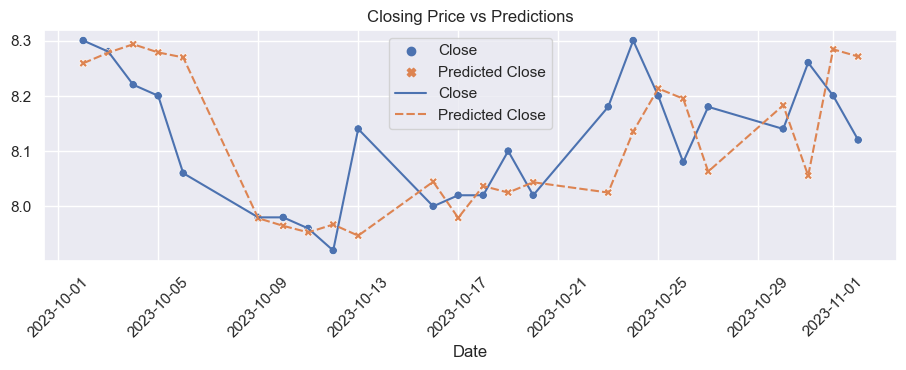

In [347]:
# build RF model with lagged values and default parameters
rf_model_default_lagged, rf_model_default_lagged_rmse = build_random_forest_default_model(main_df.copy(), 
                                                                                           diffed=False, 
                                                                                           scalled=True, 
                                                                                           best_lag_period=best_lag_period_rf, 
                                                                                           with_fe=False)

# Save the model's performance
df_default_model_with_lagged_features_rmse_performance.loc['rf'] = rf_model_default_lagged_rmse

# 8-3-5 Tuned Random Forest

  0%|          | 0/150 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 150/150 [02:13<00:00,  1.12trial/s, best loss: 0.11136067991538745]
{'criterion': 'friedman_mse', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 100}
0.11394736447017412 rmse


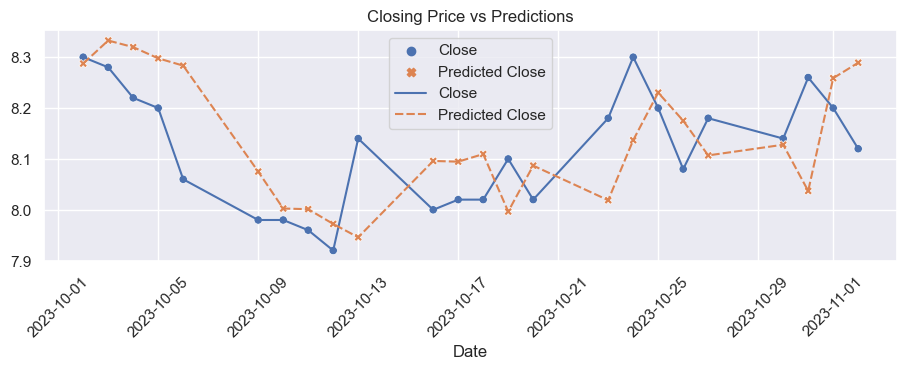

In [349]:
def randomforest_tuning(main_df, best_lag_period=0, with_fe=False):

    from hyperopt import hp, tpe, fmin, Trials, space_eval
    from sklearn.ensemble import RandomForestRegressor
    from hyperopt.pyll import scope

    train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                with_fe = with_fe,
                                is_diffed = False)


    # Set a random seed
    ''' 
    By setting the random seed with np.random.seed(42), 
    you ensure that the random sampling in Hyperopt is reproducible across runs 
    as long as the seed remains the same.
    '''
    np.random.seed(42)

    # Define the search space for hyperparameters
    space = {
        "criterion": hp.choice("criterion", ['squared_error', 'friedman_mse', 'absolute_error']),
        "n_estimators": scope.int(hp.quniform("n_estimators", 100, 200, 10)),
        "max_depth": scope.int(hp.quniform("max_depth", 2, 12, 1)),
        'min_samples_split': scope.int(hp.quniform("min_samples_split", 2, 10, 1)),
        'min_samples_leaf': scope.int(hp.quniform("min_samples_leaf", 1, 10, 1)),
        "max_features": hp.choice("max_features", ['sqrt', 'log2'])
    }

    # Define the objective function to minimize (negative mean squared error)
    def objective(params):

        #scaling the data before modeling
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(validation_set)
        validation_data = pd.DataFrame(scaled_array, columns=validation_set.columns, index=validation_set.index)

        
        # Prepare the data for Random Forest
        X_train = train_data.drop(['target'], axis=1, inplace=False)
        y_train = train_data['target']

        X_test = validation_data.drop(['target'], axis=1, inplace=False)
        y_test = validation_data['target']

        model = RandomForestRegressor(
            criterion = params['criterion'],
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            max_features=params['max_features'],
            random_state=42,
            n_jobs=4
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # unscale y_pred_diff
        train_data = train_set
        validation_data = validation_set
        y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
        y_test = validation_data['target']

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse

    # Create an instance of the Trials class to keep track of the results
    trials = Trials()

    # Run the hyperparameter search using the TPE algorithm
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=150,
                trials=trials,
                rstate=np.random.default_rng(42))

    # Get the best hyperparameters
    best_params = space_eval(space, best)
    print(best_params)

    # Train the final model with the best hyperparameters

    #scaling the data before modeling
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(train_set)
    train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)

    scaled_array = scaler.transform(test_set)
    test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)


    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']


    final_model = RandomForestRegressor(**best_params, random_state=42)
    final_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = final_model.predict(X_test)

    # unscale y_pred_diff
    train_data = train_set
    test_data = test_set
    y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
    y_test = test_data['target']

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("{} rmse".format(rmse))


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': y_pred
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')

    
    return final_model, rmse

# rf_model_tuned_lagged, rf_model_tuned_lagged_rmse = randomforest_tuning(main_df.copy(), 
#                                                                         best_lag_period=0, 
#                                                                         with_fe=False)


# # Save the model performance and model name
# df_tuned_model_with_lagged_features_rmse_performance.loc["rf_tuned"] = rf_model_tuned_lagged_rmse

  0%|          | 0/150 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 150/150 [02:28<00:00,  1.01trial/s, best loss: 0.11491056283864635]
{'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 110}
0.10337237908984714 rmse


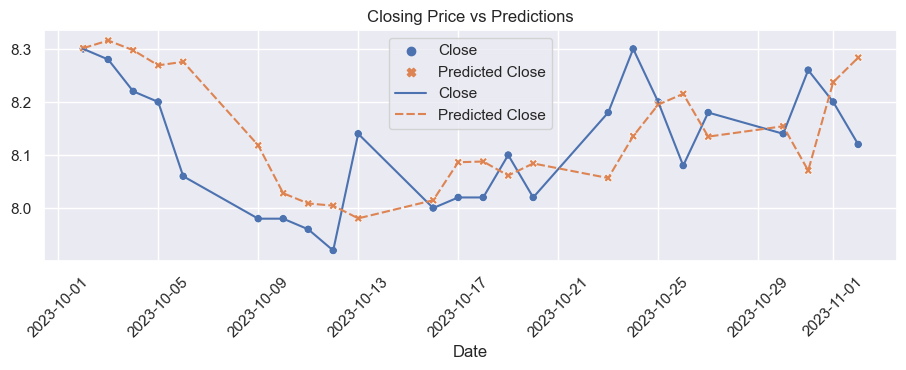

In [350]:
rf_model_tuned_lagged, rf_model_tuned_lagged_rmse = randomforest_tuning(main_df.copy(), 
                                                                        best_lag_period=best_lag_period_rf, 
                                                                        with_fe=False)

100%|██████████| 150/150 [04:03<00:00,  1.62s/trial, best loss: 0.08065484540322168]
{'criterion': 'absolute_error', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
0.10921098682470344 rmse


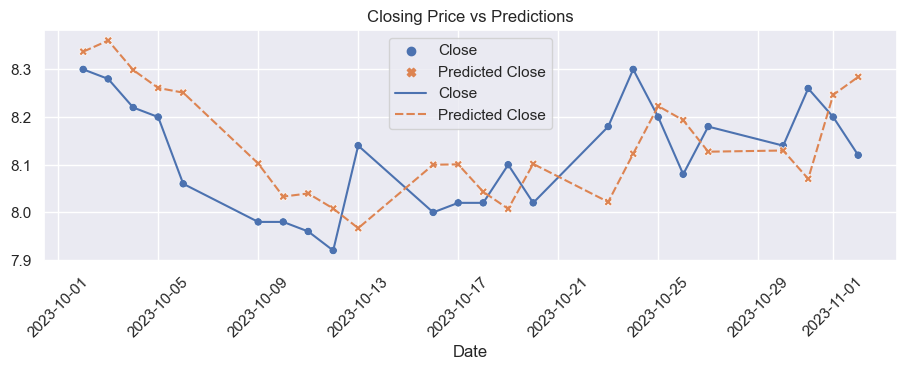

In [351]:
rf_model_tuned_lagged, rf_model_tuned_lagged_rmse = randomforest_tuning(main_df.copy(), 
                                                                        best_lag_period=0, 
                                                                        with_fe=True)

  0%|          | 0/150 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 150/150 [03:25<00:00,  1.37s/trial, best loss: 0.08963770057198135]
{'criterion': 'friedman_mse', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 120}
0.10705524641591456 rmse


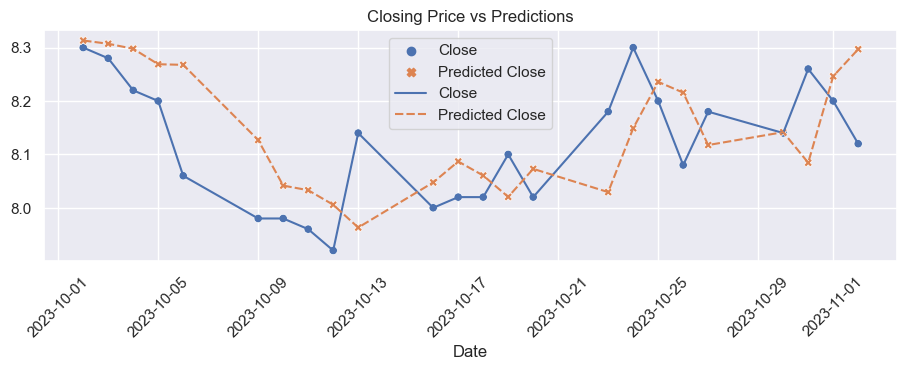

In [352]:
rf_model_tuned_lagged, rf_model_tuned_lagged_rmse = randomforest_tuning(main_df.copy(), 
                                                                        best_lag_period=best_lag_period_with_fe_rf, 
                                                                        with_fe=True)

# 8-4 Default XGBoost

In [93]:
def build_xgboost_default_model(main_df, diffed=False, scalled=False, best_lag_period=0, with_fe=False):
    
    import xgboost as xgb
    
    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = True,
                                with_fe=False)
    else:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = False,
                                with_fe=False)
        


    #scaling the data before modeling
    if scalled:
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(test_set)
        test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)
    else:
        train_data = train_set.copy()
        test_data = test_set.copy()
    
    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']
    
    
    # Train the Random Forest model
    model = xgb.XGBRegressor(n_estimators=100, seed=42)
    model.fit(X_train, y_train)

    # Make predictions using the trained model
    y_pred = model.predict(X_test)
    
    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = False)


    # unscale y_pred_diff
    if scalled and not diffed:
        # return back to original datasets
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
        
    elif scalled and diffed:
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)
    elif diffed and not scalled:
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)

        
    test_data["y_pred"] = y_pred
    
    # Calculate RMSE (Root Mean Squared Error) to evaluate the model's performance
    rmse = np.sqrt(mean_squared_error(test_data["target"], test_data["y_pred"]))
    print(f"RMSE: {rmse}")


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': test_data['y_pred']
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')
    
    
    return model, rmse

# 8-4-1 Build Default XGBoost after finding the optimal lag / order

RMSE: 0.46138375588714786


NameError: name 'df_default_model_with_lagged_features_rmse_performance' is not defined

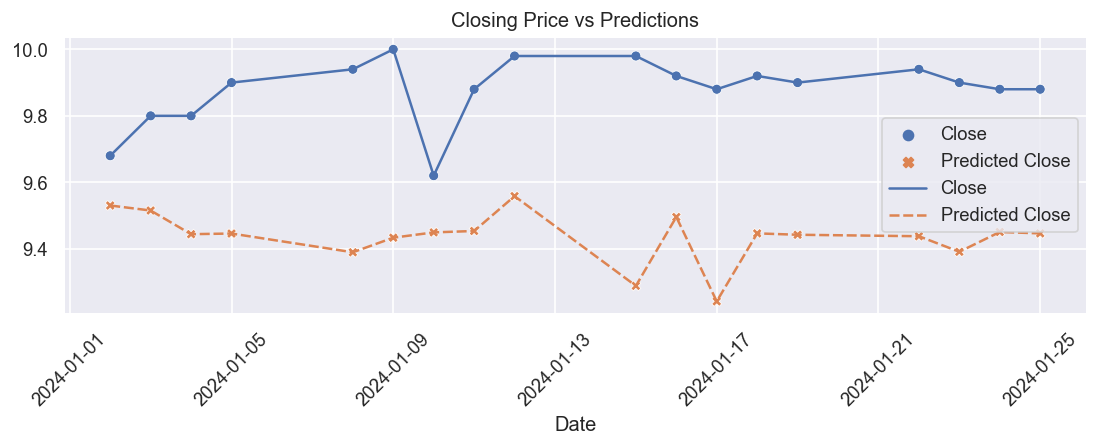

In [94]:
# build XGB model with lagged values and default parameters
xgb_model_default_lagged, xgb_model_default_lagged_rmse = build_xgboost_default_model(main_df.copy(), 
                                                                                      diffed=False, 
                                                                                      scalled=True, 
                                                                                      best_lag_period=0)


# Save the model performance
df_default_model_with_lagged_features_rmse_performance.loc['XGBoost'] = xgb_model_default_lagged_rmse

# 8-4-2 Tuned XGBoost

  0%|          | 0/150 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 150/150 [01:56<00:00,  1.29trial/s, best loss: 0.09045682389711907]
{'gamma': 0.6000000000000001, 'learning_rate': 0.025, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 120, 'subsample': 0.9}
0.09720652221407745 rmse


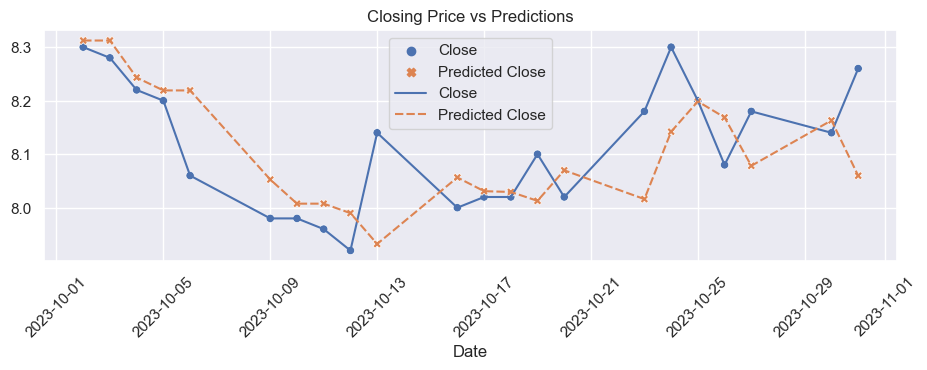

In [256]:
def xgboost_tuning(main_df, best_lag_period=0):

    from hyperopt import hp, tpe, fmin, Trials, space_eval
    import xgboost as xgb

    # Set a random seed
    ''' 
    By setting the random seed with np.random.seed(42), 
    you ensure that the random sampling in Hyperopt is reproducible across runs 
    as long as the seed remains the same.
    '''
    np.random.seed(42)

    train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                            train_start = train_start_time,
                            train_end = train_end_time,
                            validation_start = validation_start_time,
                            validation_end = validation_end_time,
                            test_start = test_start_time,
                            test_end = test_end_time,
                            best_lag_period = best_lag_period,
                            is_diffed = False)


    # Define the search space for hyperparameters
    space = {
        'n_estimators': hp.choice('n_estimators', range(100, 210, 10)),
        'max_depth': hp.choice('max_depth', range(1, 15)),
        'learning_rate':  hp.quniform('learning_rate', 0.025, 0.5, 0.025),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'min_child_weight': hp.choice('min_child_weight', range(1, 11)),
        'gamma': hp.quniform('gamma', 0.4, 1, 0.05),
    }

    # Define the objective function to minimize (negative mean squared error)
    def objective(params):

        #scaling the data before modeling
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(validation_set)
        validation_data = pd.DataFrame(scaled_array, columns=validation_set.columns, index=validation_set.index)

        
        # Prepare the data for Random Forest
        X_train = train_data.drop(['target'], axis=1, inplace=False)
        y_train = train_data['target']

        X_test = validation_data.drop(['target'], axis=1, inplace=False)
        y_test = validation_data['target']

        model = xgb.XGBRegressor(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            subsample=params['subsample'],
            min_child_weight=params['min_child_weight'],
            gamma=params['gamma'],
            objective='reg:squarederror'
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # unscale y_pred_diff
        train_data = train_set
        validation_data = validation_set
        y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
        y_test = validation_data['target']

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse

    # Create an instance of the Trials class to keep track of the results
    trials = Trials()

    # Run the hyperparameter search using the TPE algorithm
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=150,
                trials=trials,
                rstate=np.random.default_rng(42))

    # Get the best hyperparameters
    best_params = space_eval(space, best)
    print(best_params)

    # Train the final model with the best hyperparameters

    #scaling the data before modeling
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(train_set)
    train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)

    scaled_array = scaler.transform(test_set)
    test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)


    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']


    final_model = xgb.XGBRegressor(**best_params, random_state=42)
    final_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = final_model.predict(X_test)

    # unscale y_pred_diff
    train_data = train_set
    test_data = test_set
    y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
    y_test = test_data['target']

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("{} rmse".format(rmse))


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': y_pred
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')


    return final_model, rmse

xgboost_model_tuned_lagged, xgboost_model_tuned_lagged_rmse = xgboost_tuning(main_df, best_lag_period_xgb)


# Save the model performance and model name
df_tuned_model_with_lagged_features_rmse_performance.loc["XGBoost_tuned"] = xgboost_model_tuned_lagged_rmse

# 8-5 Default SVM

In [13]:
def build_svm_default_model(main_df, diffed=False, scalled=False, best_lag_period=0, with_fe=False):
    
    from sklearn.svm import SVR

    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = True,
                                with_fe = with_fe)
    else:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = False,
                                with_fe = with_fe)
        


    #scaling the data before modeling
    if scalled:
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(test_set)
        test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)
    else:
        train_data = train_set.copy()
        test_data = test_set.copy()
    
    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']
    
    
    # Train the Random Forest model
    model = SVR(kernel='linear')
    model.fit(X_train, y_train)

    # Make predictions using the trained model
    y_pred = model.predict(X_test)

    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = False)


    # unscale y_pred_diff
    if scalled and not diffed:
        # return back to original datasets
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
        
    elif scalled and diffed:
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)
    elif diffed and not scalled:
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)

        
    test_data["y_pred"] = y_pred
    
    # Calculate RMSE (Root Mean Squared Error) to evaluate the model's performance
    rmse = np.sqrt(mean_squared_error(test_data["target"], test_data["y_pred"]))
    print(f"RMSE: {rmse}")


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': test_data['y_pred']
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')
    
    
    return model, rmse

# 8-5-1 Build Default SVM after finding the optimal lag / order

RMSE: 0.09367265413502981


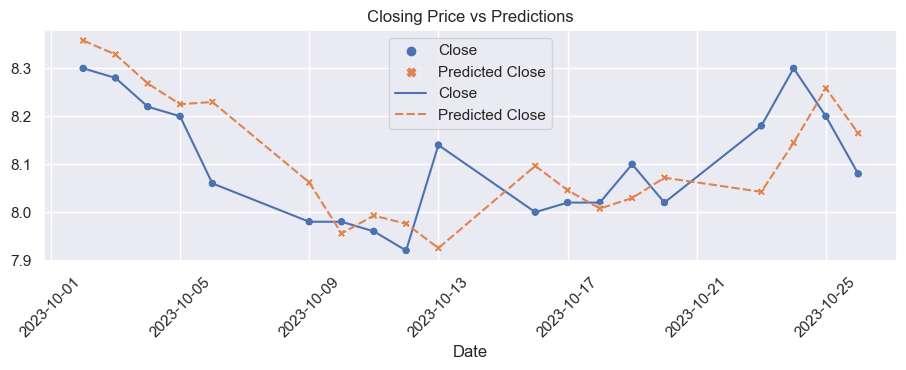

In [85]:
# build SVM model with lagged values and default parameters
# svm_model_default_lagged, svm_model_default_lagged_rmse = build_svm_default_model(main_df.copy(), diffed=False, scalled=True, best_lag_period=best_lag_period_svm)

# Save the model performance
# df_default_model_with_lagged_features_rmse_performance.loc['svm'] = svm_model_default_lagged_rmse

# 8-5-1 Tuned SVM

  2%|▏         | 2/100 [00:00<00:08, 11.44trial/s, best loss: 0.1564671563929289]

100%|██████████| 100/100 [00:14<00:00,  6.69trial/s, best loss: 0.09153645538619311]
{'C': 0.7323974548121089, 'degree': 1, 'epsilon': 0.11592868688119527, 'kernel': 'linear'}
0.09435320038490809 rmse


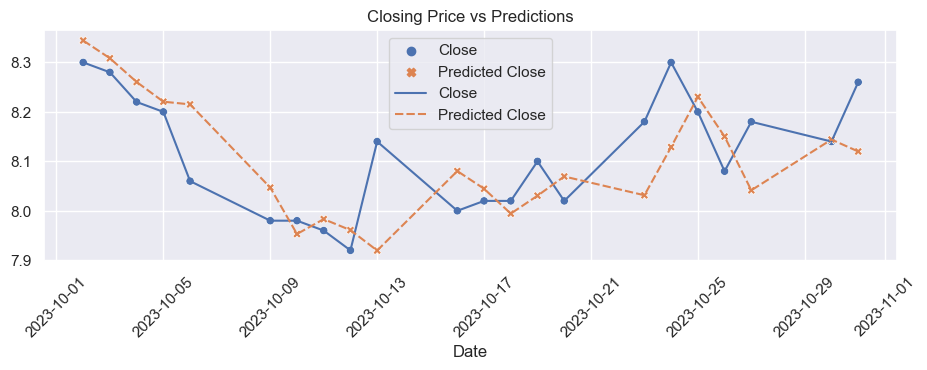

In [257]:
def svr_tuning(main_df, best_lag_period=0):

    from hyperopt import hp, tpe, fmin, Trials, space_eval
    from sklearn.svm import SVR

    # Set a random seed
    ''' 
    By setting the random seed with np.random.seed(42), 
    you ensure that the random sampling in Hyperopt is reproducible across runs 
    as long as the seed remains the same.
    '''
    np.random.seed(42)

    train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                            train_start = train_start_time,
                            train_end = train_end_time,
                            validation_start = validation_start_time,
                            validation_end = validation_end_time,
                            test_start = test_start_time,
                            test_end = test_end_time,
                            best_lag_period = best_lag_period,
                            is_diffed = False)

    # Define the search space for hyperparameters
    space = {
        'kernel': hp.choice('kernel', ['linear', 'rbf', 'sigmoid']),
        'degree':  hp.choice('degree', range(1, 6)),
        'C': hp.uniform('C', 0, 1),  # C parameter (log-uniform search space)
        'epsilon': hp.loguniform('epsilon', -4, 1),  # Epsilon (log-uniform search space)

    }

    # Define the objective function to minimize (negative mean squared error)
    def objective(params):

        #scaling the data before modeling
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(validation_set)
        validation_data = pd.DataFrame(scaled_array, columns=validation_set.columns, index=validation_set.index)

        
        # Prepare the data for Random Forest
        X_train = train_data.drop(['target'], axis=1, inplace=False)
        y_train = train_data['target']

        X_test = validation_data.drop(['target'], axis=1, inplace=False)
        y_test = validation_data['target']

        model = SVR(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # unscale y_pred_diff
        train_data = train_set
        validation_data = validation_set
        y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
        y_test = validation_data['target']

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse

    # Create an instance of the Trials class to keep track of the results
    trials = Trials()

    # Run the hyperparameter search using the TPE algorithm
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=150,
                trials=trials,
                rstate=np.random.default_rng(42))


    # Get the best hyperparameters
    best_params = space_eval(space, best)
    print(best_params)

    # Train the final model with the best hyperparameters

    #scaling the data before modeling
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(train_set)
    train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)

    scaled_array = scaler.transform(test_set)
    test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)


    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']


    final_model = SVR(**best_params)
    final_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = final_model.predict(X_test)

    # unscale y_pred_diff
    train_data = train_set
    test_data = test_set
    y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
    y_test = test_data['target']

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("{} rmse".format(rmse))

    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': y_pred
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')


    return final_model, rmse

svm_model_tuned_lagged, svm_model_tuned_lagged_rmse = svr_tuning(main_df, best_lag_period_svm)


# Save the model performance
df_tuned_model_with_lagged_features_rmse_performance.loc["svm_tuned"] = svm_model_tuned_lagged_rmse

# 8-6 Default kNN

In [15]:
def build_knn_default_model(main_df, diffed=False, scalled=False, best_lag_period=0, with_fe = False):
    
    from sklearn.neighbors import KNeighborsRegressor

    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = True,
                                with_fe = with_fe)
    else:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = False,
                                with_fe = with_fe)
        


    #scaling the data before modeling
    if scalled:
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(test_set)
        test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)
    else:
        train_data = train_set.copy()
        test_data = test_set.copy()
    
    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']
    
    
    # Train the Random Forest model
    model = KNeighborsRegressor(n_neighbors=3)
    model.fit(X_train, y_train)

    # Make predictions using the trained model
    y_pred = model.predict(X_test)
    
    if diffed:
        train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                                train_start = train_start_time,
                                train_end = train_end_time,
                                validation_start = validation_start_time,
                                validation_end = validation_end_time,
                                test_start = test_start_time,
                                test_end = test_end_time,
                                best_lag_period = best_lag_period,
                                is_diffed = False,
                                with_fe = with_fe)


    # unscale y_pred_diff
    if scalled and not diffed:
        # return back to original datasets
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
        
    elif scalled and diffed:
        y_pred = (y_pred * train_data['target'].std()) + train_data['target'].mean()
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)
    elif diffed and not scalled:
        train_data = train_set.copy()
        test_data = test_set.copy()
        y_pred = test_data["target"][0] + np.cumsum(y_pred)

        
    test_data["y_pred"] = y_pred
    
    # Calculate RMSE (Root Mean Squared Error) to evaluate the model's performance
    rmse = np.sqrt(mean_squared_error(test_data["target"], test_data["y_pred"]))
    print(f"RMSE: {rmse}")


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': test_data['y_pred']
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')
    
    return model, rmse

# knn_model_default, knn_model_default_rmse = build_knn_default_model(main_df.copy(), diffed=False, scalled=True, best_lag_period=0)

# # Save the model performance
# df_default_model_rmse_performance.loc['kNN'] = knn_model_default_rmse

# 8-6-1 Build Default kNN after finding the optimal lag / order

RMSE: 0.1522068069722054


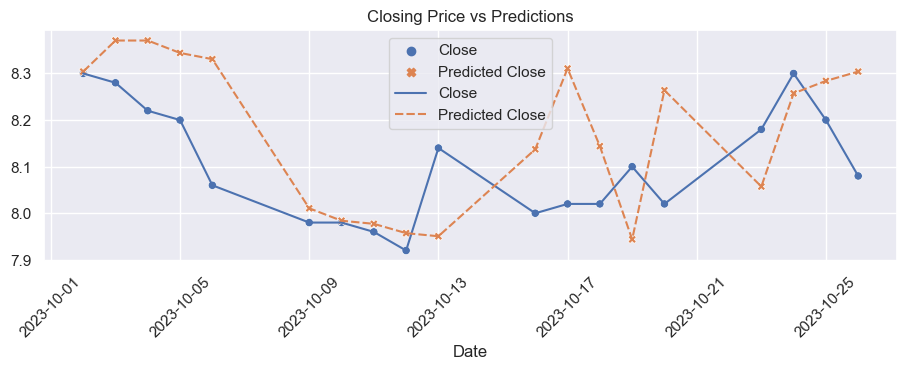

In [99]:
# build kNN model with lagged values and default parameters
knn_model_default_lagged, knn_model_default_lagged_rmse = build_knn_default_model(main_df.copy(), diffed=False, scalled=True, best_lag_period=best_lag_period_knn)


# Save the model performance
df_default_model_with_lagged_features_rmse_performance.loc['kNN'] = knn_model_default_lagged_rmse

# 8-6-1 Tuned kNN

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:05<00:00, 17.33trial/s, best loss: 0.1510124736441529]
{'n_neighbors': 7, 'p': 1.0, 'weights': 'distance'}
0.14334022111636455 rmse


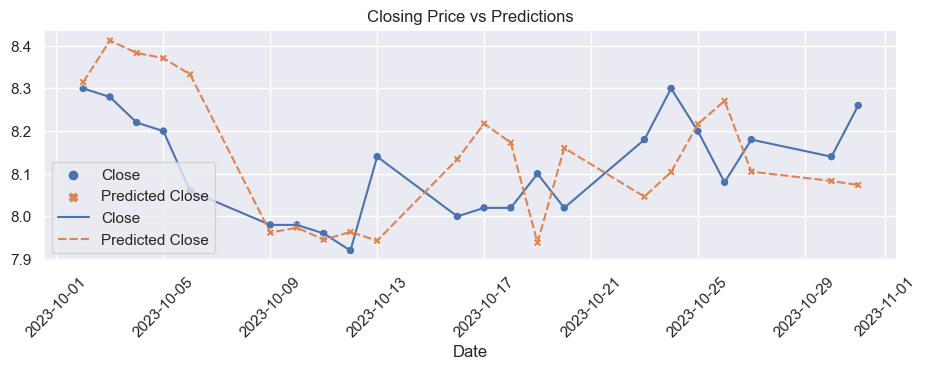

In [259]:
def kNN_tuning(main_df, best_lag_period=0):

    from hyperopt import hp, tpe, fmin, Trials, space_eval
    from sklearn.neighbors import KNeighborsRegressor

    # Set a random seed
    ''' 
    By setting the random seed with np.random.seed(42), 
    you ensure that the random sampling in Hyperopt is reproducible across runs 
    as long as the seed remains the same.
    '''
    np.random.seed(42)


    train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                            train_start = train_start_time,
                            train_end = train_end_time,
                            validation_start = validation_start_time,
                            validation_end = validation_end_time,
                            test_start = test_start_time,
                            test_end = test_end_time,
                            best_lag_period = best_lag_period,
                            is_diffed = False)

    # Define the search space for hyperparameters
    space = {
        'n_neighbors': hp.choice('n_neighbors', range(1, 21)),  # Number of neighbors (integer values)
        'weights': hp.choice('weights', ['uniform', 'distance']),
        'p': hp.quniform('p', 1, 2, 1),  # Minkowski power parameter (integer values)
    }

    # Define the objective function to minimize (negative mean squared error)
    def objective(params):

        #scaling the data before modeling
        scaler = StandardScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(validation_set)
        validation_data = pd.DataFrame(scaled_array, columns=validation_set.columns, index=validation_set.index)

        
        # Prepare the data for Random Forest
        X_train = train_data.drop(['target'], axis=1, inplace=False)
        y_train = train_data['target']

        X_test = validation_data.drop(['target'], axis=1, inplace=False)
        y_test = validation_data['target']

        model = KNeighborsRegressor(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # unscale y_pred_diff
        train_data = train_set
        validation_data = validation_set
        y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
        y_test = validation_data['target']

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse

    # Create an instance of the Trials class to keep track of the results
    trials = Trials()

    # Run the hyperparameter search using the TPE algorithm
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=150,
                trials=trials,
                rstate=np.random.default_rng(42))


    # Get the best hyperparameters
    best_params = space_eval(space, best)
    print(best_params)

    # Train the final model with the best hyperparameters

    #scaling the data before modeling
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(train_set)
    train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)

    scaled_array = scaler.transform(test_set)
    test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)


    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']


    final_model = KNeighborsRegressor(**best_params)
    final_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = final_model.predict(X_test)

    # unscale y_pred_diff
    train_data = train_set
    test_data = test_set
    y_pred = (y_pred * train_data['Close'].std()) + train_data['Close'].mean()
    y_test = test_data['target']

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("{} rmse".format(rmse))


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': y_pred
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')

    return final_model, rmse

knn_model_tuned_lagged, knn_model_tuned_lagged_rmse = kNN_tuning(main_df, best_lag_period_knn)


# Save the model performance
df_tuned_model_with_lagged_features_rmse_performance.loc["kNN_tuned"] = knn_model_tuned_lagged_rmse

# 8-7 Default DNN model

1/1 [==============================] - 0s 149ms/step
RMSE: 0.10339094045713591


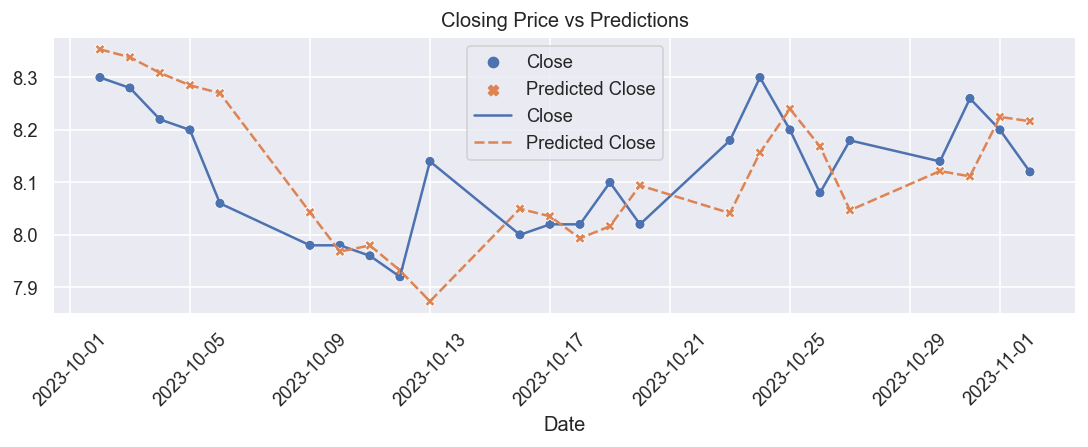

In [696]:
def build_dnn_default_model(main_df, best_lag_period=0, with_fe=False):
    
    from tensorflow import keras
    from sklearn.preprocessing import MinMaxScaler

    train_set, validation_set, train_and_validation_set, test_set = split_dataset_for_ml(main_df.copy(), 
                            train_start = train_start_time,
                            train_end = train_end_time,
                            validation_start = validation_start_time,
                            validation_end = validation_end_time,
                            test_start = test_start_time,
                            test_end = test_end_time,
                            best_lag_period = best_lag_period,
                            with_fe = with_fe,
                            is_diffed = False)

    # Set a random seed
    np.random.seed(42)
    keras.utils.set_random_seed(42)

    #scaling the data before modeling
    scaler = MinMaxScaler()
    scaled_array = scaler.fit_transform(train_set)
    train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
    
    scaled_array = scaler.transform(test_set)
    test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)

    
    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']

    
    # build the DNN model
    model = keras.Sequential()
    model.add(keras.layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(np.floor(X_train.shape[1]/2), activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    
    # Compile the model
    callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the Model
    model.fit(X_train, y_train, epochs=400, batch_size=7, verbose=0, callbacks=[callback])

    # Make predictions using the trained model
    y_pred = model.predict(X_test)
    
    # unscale y_pred_diff
    train_data = train_set.copy()
    test_data = test_set.copy()
    y_pred = (y_pred * (train_data['Close'].max() - train_data['Close'].min())) + train_data['Close'].min()
    
    test_data["y_pred"] = y_pred
    
    
    # Calculate RMSE (Root Mean Squared Error) to evaluate the model's performance
    rmse = np.sqrt(mean_squared_error(test_data["target"], test_data["y_pred"]))
    print(f"RMSE: {rmse}")


    #plot Close and predicted Close price
    
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': test_data['y_pred']
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')
    
    return model, rmse

dnn_model_default, dnn_model_default_rmse = build_dnn_default_model(main_df.copy(), best_lag_period=0, with_fe=True)

# Save the model performance
df_default_model_rmse_performance.loc['DNN'] = dnn_model_default_rmse

# 8-7-1 Build Default DNN after finding the optimal lag / order

1/1 [==============================] - 2s 2s/step
RMSE: 0.13256632254992623


(<keras.engine.sequential.Sequential at 0x17d4f9871f0>, 0.13256632254992623)

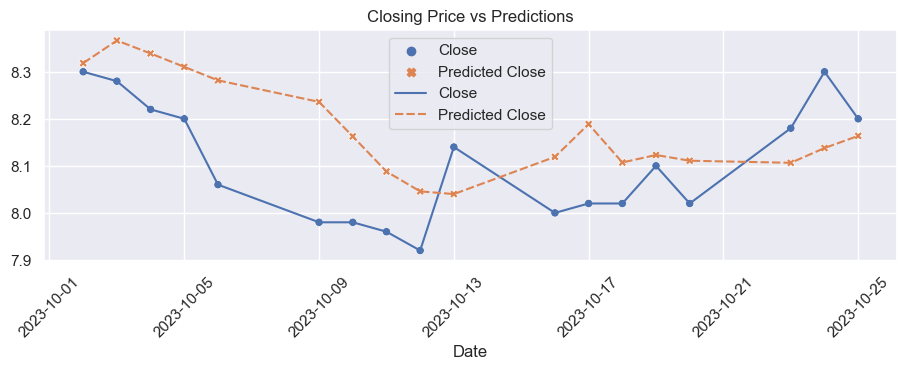

In [100]:
# build train/valid/test optimal lagged datasets for LSTM
lagged_train_set, lagged_validation_set, lagged_test_set = get_datasets_after_finding_best_lags(main_df.copy(), 
                                                                                                best_lag_period_lstm)

# build LSTM model with lagged values and default parameters
lstm_model_default_lagged, lstm_model_default_lagged_rmse = build_lstm_default_model(lagged_train_set.copy(), lagged_test_set.copy())


# Save the model performance
df_default_model_with_lagged_features_rmse_performance.loc['LSTM'] = lstm_model_default_lagged_rmse

# 8-7-1 Tuned LSTM

In [ ]:
def LSTM_tuning(train_set, validation_set, test_set):

    from hyperopt import hp, tpe, fmin, Trials, space_eval
    import keras
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    from sklearn.preprocessing import MinMaxScaler

    # Set a random seed
    ''' 
    By setting the random seed with np.random.seed(42), 
    you ensure that the random sampling in Hyperopt is reproducible across runs 
    as long as the seed remains the same.
    '''
    np.random.seed(42)

    # Define the search space for hyperparameters
    space = {
    'lstm_units': hp.choice('lstm_units', range(5, 51, 2)),
    'learning_rate': hp.quniform('learning_rate', 0.025, 0.5, 0.005),
    'batch_size': hp.choice('batch_size', range(8, 65, 4)),
    'epochs': hp.choice('epochs', range(10, 51, 5))
}

    # Define the objective function to minimize (negative mean squared error)
    def objective(params):

        #scaling the data before modeling
        scaler = MinMaxScaler()
        scaled_array = scaler.fit_transform(train_set)
        train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)
        
        scaled_array = scaler.transform(validation_set)
        validation_data = pd.DataFrame(scaled_array, columns=validation_set.columns, index=validation_set.index)

        
        # Prepare the data for Random Forest
        X_train = train_data.drop(['target'], axis=1, inplace=False)
        y_train = train_data['target']

        X_test = validation_data.drop(['target'], axis=1, inplace=False)
        y_test = validation_data['target']

        model = Sequential()
        model.add(LSTM(units=params['lstm_units'], input_shape=(X_train.shape[1], 1)))
        model.add(Dense(1))
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=params['learning_rate']), loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)
        y_pred = model.predict(X_test)

        # unscale y_pred_diff
        train_data = train_set
        validation_data = validation_set
        y_pred = (y_pred * (train_data['Close'].max() - train_data['Close'].min())) + train_data['Close'].min()
        y_test = validation_data['target']

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        return rmse

    # Create an instance of the Trials class to keep track of the results
    trials = Trials()

    # Run the hyperparameter search using the TPE algorithm
    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=150,
                trials=trials,
                rstate=np.random.default_rng(42))


    # Get the best hyperparameters
    best_params = space_eval(space, best)
    print(best_params)

    # Train the final model with the best hyperparameters

    #scaling the data before modeling
    scaler = MinMaxScaler()
    scaled_array = scaler.fit_transform(train_set)
    train_data = pd.DataFrame(scaled_array, columns=train_set.columns, index=train_set.index)

    scaled_array = scaler.transform(test_set)
    test_data = pd.DataFrame(scaled_array, columns=test_set.columns, index=test_set.index)


    # Prepare the data for Random Forest
    X_train = train_data.drop(['target'], axis=1, inplace=False)
    y_train = train_data['target']

    X_test = test_data.drop(['target'], axis=1, inplace=False)
    y_test = test_data['target']


    final_model = Sequential()
    final_model.add(LSTM(units=best_params['lstm_units'], input_shape=(X_train.shape[1], 1)))
    final_model.add(Dense(1))
    final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')
    final_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

    # Make predictions on the test set
    y_pred = final_model.predict(X_test)

    # unscale y_pred_diff
    train_data = train_set
    test_data = test_set
    y_pred = (y_pred * (train_data['Close'].max() - train_data['Close'].min())) + train_data['Close'].min()
    y_test = test_data['target']
    test_data["y_pred"] = y_pred

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("{} rmse".format(rmse))


    #plot Close and predicted Close price
    plot_df = pd.DataFrame({'Date': test_data.index,
                       'Close': test_data['target'],
                       'Predicted Close': test_data["y_pred"]
                           })


    my_plot = sns.set(rc={'figure.figsize':(11, 3)})
    plt.figure()
    my_plot = sns.scatterplot(plot_df)
    my_plot = sns.lineplot(plot_df)
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
    my_plot.set(title='Closing Price vs Predictions')

    # Save the model performance and model's name
    df_model_performances.loc["LSTM_tuned"] = rmse

    return final_model, rmse

lstm_model_tuned, lstm_tuned_rmse = LSTM_tuning(train_set, validation_set, test_set)

# 9 Run Stock Price Prediction Experiment

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2007-12-18  1.997646  2.032940  1.976470  1.983528   1.416828   20400
2007-12-19  1.948234  1.976470  1.941176  1.969411   1.406744    6516
2007-12-20  2.004705  2.004705  1.934117  1.934117   1.381534    2054
2007-12-21  1.997646  1.997646  1.948234  1.948234   1.391617    9491
2007-12-24  1.948234  1.948234  1.948234  1.948234   1.391617    4675
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2023-12-12  9.24  9.48  9.24   9.40       9.40   21943
2023-12-13  9.50  9.58  9.38   9.44       9.44   13035
2023-12-14  9.52  9.52  9.44   9.46       9.46    6771
2023-12-15  9.50  9.54  9.44   9.50       9.50   56146
2023-12-18  9.54  9.54  9.32   9.44       9.44    9712
Random Forest with Default parameters, default model
RMS

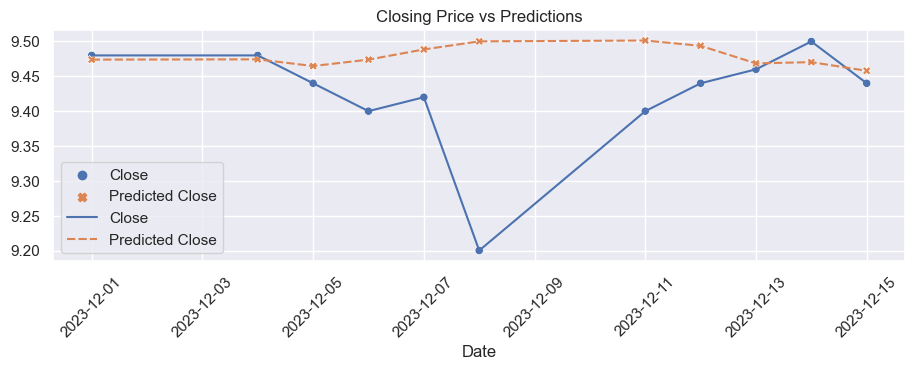

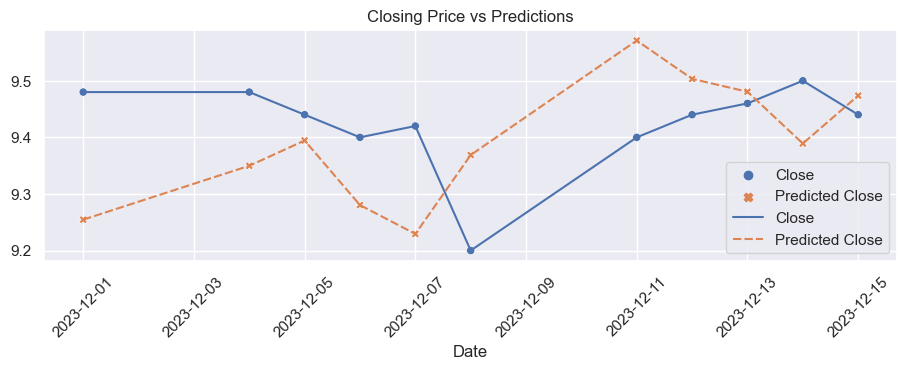

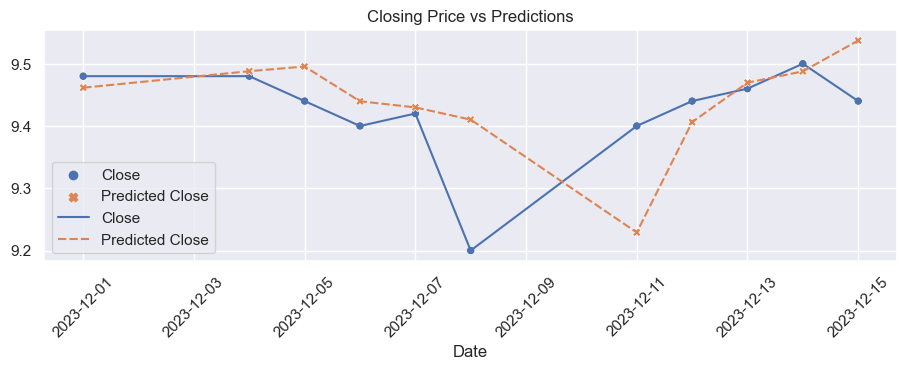

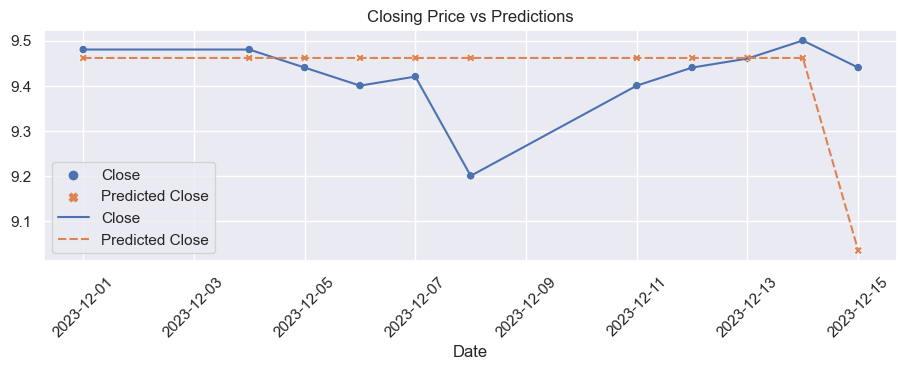

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O


# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sklearn libraries
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler


main_df = get_stock_data("KRI.AT")

print(main_df.head())
print(main_df.tail())


#Experiment_1

train_start_time = '2020-01-01'
train_end_time = '2023-11-30'

validation_start_time = '2023-11-01'
validation_end_time = '2023-11-30'

test_start_time = '2023-12-01'
test_end_time = str(main_df.index[-1].year)+"-"+str(main_df.index[-1].month)+"-"+str(main_df.index[-1].day)


########## Machine Learning experiments ##########


print("Random Forest with Default parameters, default model")

# Random Forest default model with default features
rf_model_default, rf_model_rmse = build_random_forest_default_model(main_df.copy(), 
                                                                    diffed=False, 
                                                                    scalled=True, 
                                                                    best_lag_period=0, 
                                                                    with_fe = False)

# Save the model performance
df_default_model_rmse_performance.loc['rf'] = rf_model_rmse

print("XGBoost with Default parameters, default model")

# XGBoost default model with default features
xgb_model_default_lagged, xgb_model_default_lagged_rmse = build_xgboost_default_model(main_df.copy(), 
                                                                                      diffed=False, 
                                                                                      scalled=True, 
                                                                                      best_lag_period=0,
                                                                                      with_fe=False)


# Save the model performance
df_default_model_rmse_performance.loc['XGBoost'] = xgb_model_default_lagged_rmse


# SVM default model with default features
svm_model_default, svm_model_default_rmse = build_svm_default_model(main_df.copy(), 
                                                                    diffed=False, 
                                                                    scalled=True, 
                                                                    best_lag_period=0,
                                                                    with_fe=False)

# Save the model performance
df_default_model_rmse_performance.loc['svm'] = svm_model_default_rmse

# kNN Forest default model with default features
knn_model_default, knn_model_default_rmse = build_knn_default_model(main_df.copy(), 
                                                                    diffed=False, 
                                                                    scalled=True, 
                                                                    best_lag_period=0,
                                                                    with_fe= False)

# # Save the model performance
df_default_model_rmse_performance.loc['kNN'] = knn_model_default_rmse

# 10 Evaluate Models' performances

In [100]:
# default models and default dataset
df_default_model_rmse_performance = df_default_model_rmse_performance.sort_values(by='rmse')
print("default models and default dataset")
print(df_default_model_rmse_performance.sort_values(by='rmse'))
print()


# default models and optimal lagged dataset 
df_default_model_with_lagged_features_rmse_performance = df_default_model_with_lagged_features_rmse_performance.sort_values(by='rmse')
print("default models and optimal lagged dataset")
print(df_default_model_with_lagged_features_rmse_performance.sort_values(by='rmse'))
print()


# tuned models and optimal lagged dataset 
df_tuned_model_with_lagged_features_rmse_performance = df_tuned_model_with_lagged_features_rmse_performance.sort_values(by='rmse')
print("tuned models and optimal lagged dataset ")
print(df_tuned_model_with_lagged_features_rmse_performance.sort_values(by='rmse'))
print()


# Save the dataframes to CSV files
df_default_model_rmse_performance.to_csv('df_default_model_rmse_performance_exp1.0.csv', index=True)
df_default_model_with_lagged_features_rmse_performance.to_csv('df_default_model_with_lagged_rmse_performance_exp1.0.csv', index=True)
df_tuned_model_with_lagged_features_rmse_performance.to_csv('df_tuned_model_with_lagged_rmse_performance_exp1.0.csv', index=True)


default models and default dataset
             rmse
svm      0.092551
rf       0.108698
XGBoost  0.145740
kNN      0.152207
LSTM          NaN

default models and optimal lagged dataset
             rmse
svm      0.093673
rf       0.095216
XGBoost  0.139526
kNN      0.152207
Arima         NaN
VAR           NaN
LSTM          NaN

tuned models and optimal lagged dataset 
                   rmse
svm_tuned      0.091088
XGBoost_tuned  0.096442
rf_tuned       0.104324
kNN_tuned      0.166003
Arima               NaN
VAR                 NaN
LSTM_tuned          NaN



# 10 Save the models

In [ ]:
import pickle
import os


""" 
# directory we want to create
directory_path = '/models'

# Check if the directory already exists
if not os.path.exists(directory_path):
    # If it doesn't exist, create it
    os.makedirs(directory_path) 
"""


pickle.dump(arima_model, open('arima_model_tuned_exp_1.0.pkl', 'wb'))
pickle.dump(model_var_fitted, open('var_model_tuned_exp_1.0.pkl', 'wb'))

pickle.dump(knn_model_baseline, open('knn_model_baseline_exp_1.0.pkl', 'wb'))
pickle.dump(svm_model_baseline, open('svm_model_baseline_exp_1.0.pkl', 'wb'))
pickle.dump(xgb_model_baseline, open('xgb_model_baseline_exp_1.0.pkl', 'wb'))
pickle.dump(rf_model_baseline, open('rf_model_baseline_exp_1.0.pkl', 'wb'))

pickle.dump(knn_model_tuned, open('knn_model_tuned_exp_1.0.pkl', 'wb'))
pickle.dump(svm_model_tuned, open('svm_model_tuned_exp_1.0.pkl', 'wb'))
pickle.dump(xgb_model_tuned, open('xgb_model_tuned_exp_1.0.pkl', 'wb'))
pickle.dump(rf_model_tuned, open('rf_model_tuned_exp_1.0.pkl', 'wb'))

# 11 Create Experiment info file

In [ ]:
import os

def create_file_and_write_string_values(file_name, string_values):
  
  """Creates a file and writes the given string values inside.

  Args:
    file_name: The name of the file to create.
    string_values: A list of string values to write to the file.
  """

  # If the file exists, delete it.
  if os.path.exists(file_name):
    os.remove(file_name)

  # Open the file for writing.
  with open(file_name, "w") as f:
    for string_value in string_values:
      f.write(string_value + "\n")


create_file_and_write_string_values("exp1.0-timestamps.txt", 
                                    ["train_start_time:", train_start_time, 
                                     "train_end_time:", train_end_time, 
                                     "validation_start_time:", validation_start_time, 
                                     "validation_end_time:", validation_end_time, 
                                     "test_start_time:", test_start_time])